In [15]:
from keras.models import load_model,Sequential
from keras.layers import Input, Dense, LSTM,Dropout
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix , accuracy_score

def signal_to_catagorical(data):
  data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
  data.loc[data['Signal'] == 'buy', 'Signal'] = 0
  data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
  data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
  return data

def add_shift_day(data,day):
  r_list = []
  for i in range(day,len(data)):#Number mean day to shift
    r_list.append(data[i-day : i])
  return np.array(r_list)



In [4]:
datalist = [f for f in glob.glob("../../Dataset/*.csv")]
print('have stock = ',len(datalist))

have stock =  76


In [5]:
#validation 
val_list = []
for val_name in range(71,72):
    df = pd.read_csv(datalist[val_name])
    val_x = df
    # val_x = add_shift_day(val_x,30)
    val_list.append(val_x)

#test
test_list = []
for test_name in range(72,76):
    df = pd.read_csv(datalist[test_name])
    test = df
    # test = add_shift_day(test,30)
    test_list.append(test)

In [4]:
model = Sequential()
model.add(LSTM(100, input_shape=((30,7)),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint = ModelCheckpoint('Model1_checkpoint.h5',
                               verbose=1,
                               monitor='val_acc',
                               mode='max',
                               save_best_only = True)



Epoch 1/100
93/94 [============================>.] - ETA: 0s - loss: 0.7898 - acc: 0.7036
Epoch 00001: val_acc improved from -inf to 0.71497, saving model to Model1_checkpoint.h5
94/94 [==============================] - 6s 61ms/step - loss: 0.7875 - acc: 0.7053 - val_loss: 0.7021 - val_acc: 0.7150
Epoch 2/100
93/94 [============================>.] - ETA: 0s - loss: 0.6898 - acc: 0.7093
Epoch 00002: val_acc did not improve from 0.71497
94/94 [==============================] - 4s 48ms/step - loss: 0.6880 - acc: 0.7110 - val_loss: 0.6842 - val_acc: 0.7150
Epoch 3/100
93/94 [============================>.] - ETA: 0s - loss: 0.6695 - acc: 0.7134
Epoch 00003: val_acc did not improve from 0.71497
94/94 [==============================] - 4s 48ms/step - loss: 0.6679 - acc: 0.7150 - val_loss: 0.6718 - val_acc: 0.7150
Epoch 4/100
94/94 [==============================] - ETA: 0s - loss: 0.6523 - acc: 0.7157
Epoch 00004: val_acc did not improve from 0.71497
94/94 [==============================] - 

93/94 [============================>.] - ETA: 0s - loss: 0.4346 - acc: 0.8196
Epoch 00032: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 54ms/step - loss: 0.4351 - acc: 0.8189 - val_loss: 0.7850 - val_acc: 0.6812
Epoch 33/100
93/94 [============================>.] - ETA: 0s - loss: 0.4379 - acc: 0.8054
Epoch 00033: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 54ms/step - loss: 0.4374 - acc: 0.8055 - val_loss: 0.9039 - val_acc: 0.7003
Epoch 34/100
93/94 [============================>.] - ETA: 0s - loss: 0.4193 - acc: 0.8132
Epoch 00034: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 51ms/step - loss: 0.4203 - acc: 0.8126 - val_loss: 0.9167 - val_acc: 0.6728
Epoch 35/100
94/94 [==============================] - ETA: 0s - loss: 0.4499 - acc: 0.8166
Epoch 00035: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 50ms/step - loss: 0.4499 - acc: 0.8166 - val_

Epoch 64/100
93/94 [============================>.] - ETA: 0s - loss: 0.1739 - acc: 0.9388
Epoch 00064: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 54ms/step - loss: 0.1749 - acc: 0.9382 - val_loss: 1.3653 - val_acc: 0.6698
Epoch 65/100
93/94 [============================>.] - ETA: 0s - loss: 0.1473 - acc: 0.9489
Epoch 00065: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 51ms/step - loss: 0.1478 - acc: 0.9485 - val_loss: 1.4167 - val_acc: 0.6500
Epoch 66/100
94/94 [==============================] - ETA: 0s - loss: 0.1781 - acc: 0.9365
Epoch 00066: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 53ms/step - loss: 0.1781 - acc: 0.9365 - val_loss: 1.4430 - val_acc: 0.6709
Epoch 67/100
94/94 [==============================] - ETA: 0s - loss: 0.2285 - acc: 0.9222
Epoch 00067: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 52ms/step - loss: 0.2285 - acc: 

Epoch 96/100
93/94 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9755
Epoch 00096: val_acc did not improve from 0.71497
94/94 [==============================] - 4s 47ms/step - loss: 0.0751 - acc: 0.9746 - val_loss: 1.5250 - val_acc: 0.6566
Epoch 97/100
94/94 [==============================] - ETA: 0s - loss: 0.0518 - acc: 0.9853
Epoch 00097: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 49ms/step - loss: 0.0518 - acc: 0.9853 - val_loss: 1.6550 - val_acc: 0.6739
Epoch 98/100
93/94 [============================>.] - ETA: 0s - loss: 0.0536 - acc: 0.9835
Epoch 00098: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 49ms/step - loss: 0.0551 - acc: 0.9830 - val_loss: 1.7564 - val_acc: 0.6742
Epoch 99/100
93/94 [============================>.] - ETA: 0s - loss: 0.0909 - acc: 0.9698
Epoch 00099: val_acc did not improve from 0.71497
94/94 [==============================] - 5s 49ms/step - loss: 0.0919 - acc: 

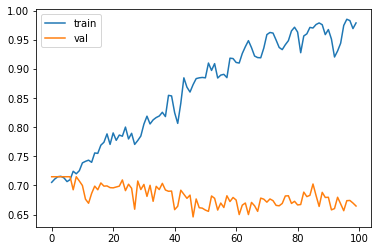

[]
Epoch 1/100
69/70 [============================>.] - ETA: 0s - loss: 1.1001 - acc: 0.6852
Epoch 00001: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 50ms/step - loss: 1.0871 - acc: 0.6896 - val_loss: 0.8983 - val_acc: 0.7128
Epoch 2/100
69/70 [============================>.] - ETA: 0s - loss: 0.5579 - acc: 0.7917
Epoch 00002: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 52ms/step - loss: 0.5526 - acc: 0.7946 - val_loss: 0.7573 - val_acc: 0.7076
Epoch 3/100
69/70 [============================>.] - ETA: 0s - loss: 0.4999 - acc: 0.7957
Epoch 00003: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 52ms/step - loss: 0.4945 - acc: 0.7986 - val_loss: 0.7842 - val_acc: 0.7036
Epoch 4/100
69/70 [============================>.] - ETA: 0s - loss: 0.4662 - acc: 0.8012
Epoch 00004: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 52ms/step - loss: 0.4608 - acc: 0

Epoch 33/100
69/70 [============================>.] - ETA: 0s - loss: 0.0761 - acc: 0.9719
Epoch 00033: val_acc did not improve from 0.71497
70/70 [==============================] - 3s 48ms/step - loss: 0.0750 - acc: 0.9723 - val_loss: 1.8584 - val_acc: 0.6277
Epoch 34/100
69/70 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9697
Epoch 00034: val_acc did not improve from 0.71497
70/70 [==============================] - 3s 49ms/step - loss: 0.0767 - acc: 0.9701 - val_loss: 1.9990 - val_acc: 0.6368
Epoch 35/100
69/70 [============================>.] - ETA: 0s - loss: 0.0743 - acc: 0.9737
Epoch 00035: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 52ms/step - loss: 0.0733 - acc: 0.9741 - val_loss: 1.8924 - val_acc: 0.6398
Epoch 36/100
69/70 [============================>.] - ETA: 0s - loss: 0.1093 - acc: 0.9579
Epoch 00036: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 54ms/step - loss: 0.1078 - acc: 

Epoch 65/100
69/70 [============================>.] - ETA: 0s - loss: 0.0284 - acc: 0.9937
Epoch 00065: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 52ms/step - loss: 0.0280 - acc: 0.9937 - val_loss: 2.0285 - val_acc: 0.6530
Epoch 66/100
69/70 [============================>.] - ETA: 0s - loss: 0.0302 - acc: 0.9891
Epoch 00066: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 52ms/step - loss: 0.0298 - acc: 0.9893 - val_loss: 2.1319 - val_acc: 0.6442
Epoch 67/100
69/70 [============================>.] - ETA: 0s - loss: 0.0256 - acc: 0.9923
Epoch 00067: val_acc did not improve from 0.71497
70/70 [==============================] - 3s 48ms/step - loss: 0.0252 - acc: 0.9924 - val_loss: 2.1909 - val_acc: 0.6277
Epoch 68/100
69/70 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.9855
Epoch 00068: val_acc did not improve from 0.71497
70/70 [==============================] - 3s 49ms/step - loss: 0.0417 - acc: 

69/70 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9851
Epoch 00096: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 58ms/step - loss: 0.0397 - acc: 0.9853 - val_loss: 1.9726 - val_acc: 0.6552
Epoch 97/100
69/70 [============================>.] - ETA: 0s - loss: 0.0271 - acc: 0.9909
Epoch 00097: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 54ms/step - loss: 0.0267 - acc: 0.9911 - val_loss: 2.0951 - val_acc: 0.6618
Epoch 98/100
69/70 [============================>.] - ETA: 0s - loss: 0.0223 - acc: 0.9918
Epoch 00098: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 56ms/step - loss: 0.0220 - acc: 0.9920 - val_loss: 2.0794 - val_acc: 0.6489
Epoch 99/100
69/70 [============================>.] - ETA: 0s - loss: 0.0260 - acc: 0.9896
Epoch 00099: val_acc did not improve from 0.71497
70/70 [==============================] - 4s 57ms/step - loss: 0.0257 - acc: 0.9897 - val_

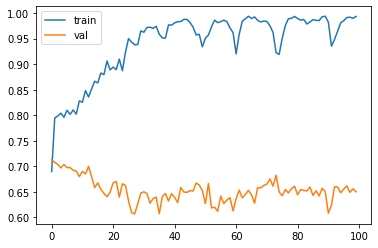

[]
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 0.7890 - acc: 0.7800
Epoch 00001: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.7955 - acc: 0.7770 - val_loss: 0.8864 - val_acc: 0.6783
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.4442 - acc: 0.8291
Epoch 00002: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 48ms/step - loss: 0.4476 - acc: 0.8256 - val_loss: 0.8350 - val_acc: 0.6823
Epoch 3/100
78/78 [==============================] - ETA: 0s - loss: 0.3958 - acc: 0.8425
Epoch 00003: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 55ms/step - loss: 0.3958 - acc: 0.8425 - val_loss: 0.8823 - val_acc: 0.6849
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.3338 - acc: 0.8718
Epoch 00004: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 55ms/step - loss: 0.3332 - acc: 0

77/78 [============================>.] - ETA: 0s - loss: 0.0922 - acc: 0.9671
Epoch 00032: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 55ms/step - loss: 0.0933 - acc: 0.9667 - val_loss: 1.6096 - val_acc: 0.6178
Epoch 33/100
78/78 [==============================] - ETA: 0s - loss: 0.0637 - acc: 0.9743
Epoch 00033: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 57ms/step - loss: 0.0637 - acc: 0.9743 - val_loss: 1.6444 - val_acc: 0.6222
Epoch 34/100
78/78 [==============================] - ETA: 0s - loss: 0.0519 - acc: 0.9831
Epoch 00034: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.0519 - acc: 0.9831 - val_loss: 1.6667 - val_acc: 0.6218
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.0392 - acc: 0.9862
Epoch 00035: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 50ms/step - loss: 0.0390 - acc: 0.9863 - val_

Epoch 64/100
77/78 [============================>.] - ETA: 0s - loss: 0.0189 - acc: 0.9923 - E
Epoch 00064: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 54ms/step - loss: 0.0194 - acc: 0.9920 - val_loss: 2.1730 - val_acc: 0.6152
Epoch 65/100
77/78 [============================>.] - ETA: 0s - loss: 0.0241 - acc: 0.9915
Epoch 00065: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 59ms/step - loss: 0.0244 - acc: 0.9912 - val_loss: 2.2240 - val_acc: 0.6137
Epoch 66/100
78/78 [==============================] - ETA: 0s - loss: 0.0279 - acc: 0.9904
Epoch 00066: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 56ms/step - loss: 0.0279 - acc: 0.9904 - val_loss: 2.2040 - val_acc: 0.6145
Epoch 67/100
77/78 [============================>.] - ETA: 0s - loss: 0.0221 - acc: 0.9939
Epoch 00067: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 57ms/step - loss: 0.0221 - a

Epoch 96/100
77/78 [============================>.] - ETA: 0s - loss: 0.0112 - acc: 0.9976
Epoch 00096: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0113 - acc: 0.9976 - val_loss: 2.1803 - val_acc: 0.6438
Epoch 97/100
78/78 [==============================] - ETA: 0s - loss: 0.0086 - acc: 0.9976
Epoch 00097: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 55ms/step - loss: 0.0086 - acc: 0.9976 - val_loss: 2.2759 - val_acc: 0.6387
Epoch 98/100
77/78 [============================>.] - ETA: 0s - loss: 0.0129 - acc: 0.9963
Epoch 00098: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.0132 - acc: 0.9960 - val_loss: 2.1928 - val_acc: 0.6383
Epoch 99/100
77/78 [============================>.] - ETA: 0s - loss: 0.0178 - acc: 0.9927
Epoch 00099: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0184 - acc: 

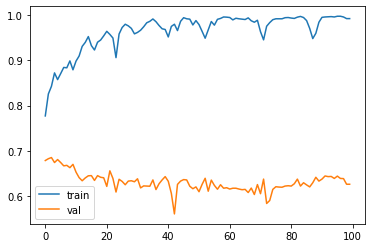

[]
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 0.5644 - acc: 0.8575
Epoch 00001: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 49ms/step - loss: 0.5764 - acc: 0.8558 - val_loss: 1.4154 - val_acc: 0.6974
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.2780 - acc: 0.9221
Epoch 00002: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.2810 - acc: 0.9204 - val_loss: 1.0713 - val_acc: 0.7010
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.2325 - acc: 0.9241
Epoch 00003: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 56ms/step - loss: 0.2340 - acc: 0.9229 - val_loss: 1.1805 - val_acc: 0.6996
Epoch 4/100
78/78 [==============================] - ETA: 0s - loss: 0.2030 - acc: 0.9321
Epoch 00004: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 56ms/step - loss: 0.2030 - acc: 0

Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.1319 - acc: 0.9550
Epoch 00033: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 48ms/step - loss: 0.1319 - acc: 0.9546 - val_loss: 1.6741 - val_acc: 0.7021
Epoch 34/100
77/78 [============================>.] - ETA: 0s - loss: 0.1557 - acc: 0.9558
Epoch 00034: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 50ms/step - loss: 0.1580 - acc: 0.9542 - val_loss: 1.5462 - val_acc: 0.6948
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.1202 - acc: 0.9578
Epoch 00035: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 50ms/step - loss: 0.1209 - acc: 0.9574 - val_loss: 1.6607 - val_acc: 0.6952
Epoch 36/100
77/78 [============================>.] - ETA: 0s - loss: 0.1408 - acc: 0.9541
Epoch 00036: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 50ms/step - loss: 0.1407 - acc: 

Epoch 65/100
77/78 [============================>.] - ETA: 0s - loss: 0.0631 - acc: 0.9732
Epoch 00065: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0627 - acc: 0.9735 - val_loss: 1.8466 - val_acc: 0.7003
Epoch 66/100
77/78 [============================>.] - ETA: 0s - loss: 0.0830 - acc: 0.9675
Epoch 00066: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0828 - acc: 0.9675 - val_loss: 1.8784 - val_acc: 0.6937
Epoch 67/100
77/78 [============================>.] - ETA: 0s - loss: 0.0734 - acc: 0.9777
Epoch 00067: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.0750 - acc: 0.9771 - val_loss: 1.7748 - val_acc: 0.6915
Epoch 68/100
77/78 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9866
Epoch 00068: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.0423 - acc: 

Epoch 97/100
77/78 [============================>.] - ETA: 0s - loss: 0.0208 - acc: 0.9927
Epoch 00097: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 49ms/step - loss: 0.0213 - acc: 0.9924 - val_loss: 1.9436 - val_acc: 0.6930
Epoch 98/100
77/78 [============================>.] - ETA: 0s - loss: 0.0165 - acc: 0.9947
Epoch 00098: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0167 - acc: 0.9948 - val_loss: 2.0589 - val_acc: 0.6926
Epoch 99/100
77/78 [============================>.] - ETA: 0s - loss: 0.0175 - acc: 0.9943
Epoch 00099: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0191 - acc: 0.9936 - val_loss: 2.0343 - val_acc: 0.7010
Epoch 100/100
77/78 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.9968
Epoch 00100: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0121 - acc:

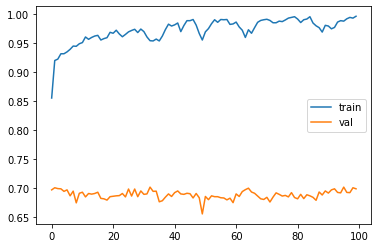

[]
Epoch 1/100
95/95 [==============================] - ETA: 0s - loss: 1.0319 - acc: 0.7124
Epoch 00001: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 48ms/step - loss: 1.0319 - acc: 0.7124 - val_loss: 0.8789 - val_acc: 0.6720
Epoch 2/100
95/95 [==============================] - ETA: 0s - loss: 0.6158 - acc: 0.7160
Epoch 00002: val_acc did not improve from 0.71497
95/95 [==============================] - 4s 44ms/step - loss: 0.6158 - acc: 0.7160 - val_loss: 0.8662 - val_acc: 0.6691
Epoch 3/100
95/95 [==============================] - ETA: 0s - loss: 0.5770 - acc: 0.7226
Epoch 00003: val_acc did not improve from 0.71497
95/95 [==============================] - 4s 47ms/step - loss: 0.5770 - acc: 0.7226 - val_loss: 0.8774 - val_acc: 0.6702
Epoch 4/100
95/95 [==============================] - ETA: 0s - loss: 0.5527 - acc: 0.7338
Epoch 00004: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 48ms/step - loss: 0.5527 - acc: 0

95/95 [==============================] - ETA: 0s - loss: 0.1341 - acc: 0.9545
Epoch 00032: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 54ms/step - loss: 0.1341 - acc: 0.9545 - val_loss: 2.0579 - val_acc: 0.6445
Epoch 33/100
95/95 [==============================] - ETA: 0s - loss: 0.1409 - acc: 0.9482
Epoch 00033: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 51ms/step - loss: 0.1409 - acc: 0.9482 - val_loss: 2.0000 - val_acc: 0.6365
Epoch 34/100
94/95 [============================>.] - ETA: 0s - loss: 0.1860 - acc: 0.9388
Epoch 00034: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 51ms/step - loss: 0.1846 - acc: 0.9393 - val_loss: 1.9236 - val_acc: 0.6530
Epoch 35/100
94/95 [============================>.] - ETA: 0s - loss: 0.1209 - acc: 0.9558
Epoch 00035: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 53ms/step - loss: 0.1200 - acc: 0.9561 - val_

Epoch 64/100
95/95 [==============================] - ETA: 0s - loss: 0.0344 - acc: 0.9848
Epoch 00064: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 50ms/step - loss: 0.0344 - acc: 0.9848 - val_loss: 2.3653 - val_acc: 0.6427
Epoch 65/100
95/95 [==============================] - ETA: 0s - loss: 0.0411 - acc: 0.9845
Epoch 00065: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 50ms/step - loss: 0.0411 - acc: 0.9845 - val_loss: 2.3052 - val_acc: 0.6442
Epoch 66/100
95/95 [==============================] - ETA: 0s - loss: 0.0292 - acc: 0.9885
Epoch 00066: val_acc did not improve from 0.71497
95/95 [==============================] - 4s 46ms/step - loss: 0.0292 - acc: 0.9885 - val_loss: 2.3319 - val_acc: 0.6442
Epoch 67/100
95/95 [==============================] - ETA: 0s - loss: 0.0192 - acc: 0.9944
Epoch 00067: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 49ms/step - loss: 0.0192 - acc: 

Epoch 96/100
94/95 [============================>.] - ETA: 0s - loss: 0.0203 - acc: 0.9927
Epoch 00096: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 50ms/step - loss: 0.0201 - acc: 0.9927 - val_loss: 2.6951 - val_acc: 0.6156
Epoch 97/100
95/95 [==============================] - ETA: 0s - loss: 0.0359 - acc: 0.9861
Epoch 00097: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 50ms/step - loss: 0.0359 - acc: 0.9861 - val_loss: 2.6248 - val_acc: 0.6299
Epoch 98/100
95/95 [==============================] - ETA: 0s - loss: 0.0577 - acc: 0.9815
Epoch 00098: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 50ms/step - loss: 0.0577 - acc: 0.9815 - val_loss: 2.4006 - val_acc: 0.6218
Epoch 99/100
95/95 [==============================] - ETA: 0s - loss: 0.0753 - acc: 0.9766
Epoch 00099: val_acc did not improve from 0.71497
95/95 [==============================] - 5s 49ms/step - loss: 0.0753 - acc: 

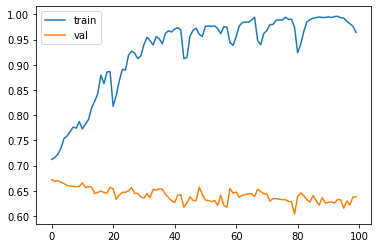

[]
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 0.9413 - acc: 0.7033
Epoch 00001: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.9322 - acc: 0.7063 - val_loss: 1.1386 - val_acc: 0.6798
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.4720 - acc: 0.8007
Epoch 00002: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.4676 - acc: 0.8027 - val_loss: 1.0935 - val_acc: 0.6955
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.3717 - acc: 0.8381
Epoch 00003: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.3682 - acc: 0.8397 - val_loss: 1.1521 - val_acc: 0.6878
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.3146 - acc: 0.8588
Epoch 00004: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.3116 - acc: 0

Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0246 - acc: 0.9935
Epoch 00033: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 53ms/step - loss: 0.0244 - acc: 0.9936 - val_loss: 2.2002 - val_acc: 0.6724
Epoch 34/100
77/78 [============================>.] - ETA: 0s - loss: 0.0260 - acc: 0.9899
Epoch 00034: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0258 - acc: 0.9900 - val_loss: 2.2196 - val_acc: 0.6423
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.0448 - acc: 0.9842
Epoch 00035: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0444 - acc: 0.9843 - val_loss: 2.2642 - val_acc: 0.6742
Epoch 36/100
77/78 [============================>.] - ETA: 0s - loss: 0.0356 - acc: 0.9886
Epoch 00036: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0352 - acc: 

Epoch 65/100
77/78 [============================>.] - ETA: 0s - loss: 0.0242 - acc: 0.9919
Epoch 00065: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0240 - acc: 0.9920 - val_loss: 2.2460 - val_acc: 0.6625
Epoch 66/100
78/78 [==============================] - ETA: 0s - loss: 0.0432 - acc: 0.9875
Epoch 00066: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0432 - acc: 0.9875 - val_loss: 2.2959 - val_acc: 0.6621
Epoch 67/100
77/78 [============================>.] - ETA: 0s - loss: 0.0392 - acc: 0.9874
Epoch 00067: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0388 - acc: 0.9875 - val_loss: 2.2601 - val_acc: 0.6515
Epoch 68/100
77/78 [============================>.] - ETA: 0s - loss: 0.1306 - acc: 0.9631
Epoch 00068: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 49ms/step - loss: 0.1293 - acc: 

Epoch 97/100
77/78 [============================>.] - ETA: 0s - loss: 0.0654 - acc: 0.9834
Epoch 00097: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0647 - acc: 0.9835 - val_loss: 2.2041 - val_acc: 0.6735
Epoch 98/100
77/78 [============================>.] - ETA: 0s - loss: 0.0638 - acc: 0.9781
Epoch 00098: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 47ms/step - loss: 0.0632 - acc: 0.9783 - val_loss: 2.3707 - val_acc: 0.6720
Epoch 99/100
77/78 [============================>.] - ETA: 0s - loss: 0.0460 - acc: 0.9797
Epoch 00099: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 50ms/step - loss: 0.0455 - acc: 0.9799 - val_loss: 2.4042 - val_acc: 0.6838
Epoch 100/100
77/78 [============================>.] - ETA: 0s - loss: 0.0249 - acc: 0.9907
Epoch 00100: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0247 - acc:

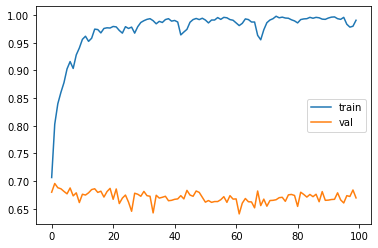

[]
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 1.0039 - acc: 0.7561
Epoch 00001: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 1.0101 - acc: 0.7553 - val_loss: 1.1568 - val_acc: 0.6999
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.4632 - acc: 0.8170
Epoch 00002: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.4659 - acc: 0.8164 - val_loss: 1.0785 - val_acc: 0.6926
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.4023 - acc: 0.8324
Epoch 00003: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 48ms/step - loss: 0.4052 - acc: 0.8288 - val_loss: 1.0978 - val_acc: 0.6775
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.3385 - acc: 0.8567
Epoch 00004: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.3428 - acc: 0

Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0228 - acc: 0.9943
Epoch 00033: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0226 - acc: 0.9944 - val_loss: 1.9838 - val_acc: 0.6552
Epoch 34/100
77/78 [============================>.] - ETA: 0s - loss: 0.0284 - acc: 0.9919
Epoch 00034: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0284 - acc: 0.9920 - val_loss: 2.0476 - val_acc: 0.6357
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.0289 - acc: 0.9911
Epoch 00035: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0287 - acc: 0.9912 - val_loss: 2.1256 - val_acc: 0.6387
Epoch 36/100
77/78 [============================>.] - ETA: 0s - loss: 0.0231 - acc: 0.9927
Epoch 00036: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 48ms/step - loss: 0.0229 - acc: 

78/78 [==============================] - ETA: 0s - loss: 0.0118 - acc: 0.9964
Epoch 00064: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 65ms/step - loss: 0.0118 - acc: 0.9964 - val_loss: 2.2313 - val_acc: 0.6632
Epoch 65/100
78/78 [==============================] - ETA: 0s - loss: 0.0155 - acc: 0.9952
Epoch 00065: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 63ms/step - loss: 0.0155 - acc: 0.9952 - val_loss: 2.2255 - val_acc: 0.6636
Epoch 66/100
78/78 [==============================] - ETA: 0s - loss: 0.0113 - acc: 0.9976- ETA: 0s - loss: 0.0122 - acc: 0
Epoch 00066: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 63ms/step - loss: 0.0113 - acc: 0.9976 - val_loss: 2.2765 - val_acc: 0.6577
Epoch 67/100
78/78 [==============================] - ETA: 0s - loss: 0.0122 - acc: 0.9960
Epoch 00067: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 65ms/step - 

Epoch 95/100
77/78 [============================>.] - ETA: 0s - loss: 0.0103 - acc: 0.9968
Epoch 00095: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 65ms/step - loss: 0.0103 - acc: 0.9968 - val_loss: 2.2052 - val_acc: 0.6563
Epoch 96/100
77/78 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.9980
Epoch 00096: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 65ms/step - loss: 0.0078 - acc: 0.9980 - val_loss: 2.2547 - val_acc: 0.6537
Epoch 97/100
77/78 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.9976
Epoch 00097: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 67ms/step - loss: 0.0089 - acc: 0.9976 - val_loss: 2.2020 - val_acc: 0.6610
Epoch 98/100
78/78 [==============================] - ETA: 0s - loss: 0.0199 - acc: 0.9924
Epoch 00098: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 65ms/step - loss: 0.0199 - acc: 

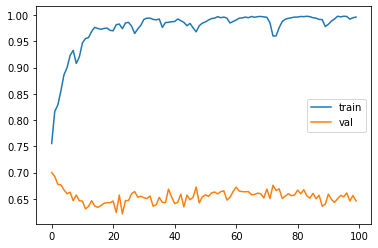

[]
Epoch 1/100
78/78 [==============================] - ETA: 0s - loss: 0.6690 - acc: 0.8377
Epoch 00001: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 65ms/step - loss: 0.6690 - acc: 0.8377 - val_loss: 0.9691 - val_acc: 0.6842
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.3700 - acc: 0.8644
Epoch 00002: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 64ms/step - loss: 0.3744 - acc: 0.8626 - val_loss: 0.8668 - val_acc: 0.6952
Epoch 3/100
78/78 [==============================] - ETA: 0s - loss: 0.2923 - acc: 0.8831
Epoch 00003: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 65ms/step - loss: 0.2923 - acc: 0.8831 - val_loss: 0.9290 - val_acc: 0.6882
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.2432 - acc: 0.9071
Epoch 00004: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 64ms/step - loss: 0.2467 - acc: 0

78/78 [==============================] - ETA: 0s - loss: 0.0235 - acc: 0.9920
Epoch 00032: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0235 - acc: 0.9920 - val_loss: 1.9411 - val_acc: 0.6834
Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0267 - acc: 0.9894
Epoch 00033: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 52ms/step - loss: 0.0269 - acc: 0.9892 - val_loss: 2.0651 - val_acc: 0.6860
Epoch 34/100
78/78 [==============================] - ETA: 0s - loss: 0.0324 - acc: 0.9892
Epoch 00034: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 61ms/step - loss: 0.0324 - acc: 0.9892 - val_loss: 1.9520 - val_acc: 0.6636
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.0321 - acc: 0.9870
Epoch 00035: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 54ms/step - loss: 0.0321 - acc: 0.9871 - val_

78/78 [==============================] - ETA: 0s - loss: 0.0302 - acc: 0.9920
Epoch 00063: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 57ms/step - loss: 0.0302 - acc: 0.9920 - val_loss: 2.0651 - val_acc: 0.6684
Epoch 64/100
77/78 [============================>.] - ETA: 0s - loss: 0.0323 - acc: 0.9874- 
Epoch 00064: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 59ms/step - loss: 0.0324 - acc: 0.9875 - val_loss: 2.1325 - val_acc: 0.6728
Epoch 65/100
77/78 [============================>.] - ETA: 0s - loss: 0.0168 - acc: 0.9943
Epoch 00065: val_acc did not improve from 0.71497
78/78 [==============================] - 5s 58ms/step - loss: 0.0167 - acc: 0.9944 - val_loss: 2.1810 - val_acc: 0.6882
Epoch 66/100
77/78 [============================>.] - ETA: 0s - loss: 0.0291 - acc: 0.9899
Epoch 00066: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 56ms/step - loss: 0.0290 - acc: 0.9900 - va

Epoch 95/100
77/78 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9951
Epoch 00095: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0129 - acc: 0.9952 - val_loss: 2.0924 - val_acc: 0.6941
Epoch 96/100
77/78 [============================>.] - ETA: 0s - loss: 0.0106 - acc: 0.9976
Epoch 00096: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 51ms/step - loss: 0.0106 - acc: 0.9976 - val_loss: 2.2332 - val_acc: 0.7062
Epoch 97/100
77/78 [============================>.] - ETA: 0s - loss: 0.0095 - acc: 0.9963
Epoch 00097: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 50ms/step - loss: 0.0095 - acc: 0.9964 - val_loss: 2.1415 - val_acc: 0.6999
Epoch 98/100
77/78 [============================>.] - ETA: 0s - loss: 0.0094 - acc: 0.9968
Epoch 00098: val_acc did not improve from 0.71497
78/78 [==============================] - 4s 47ms/step - loss: 0.0094 - acc: 

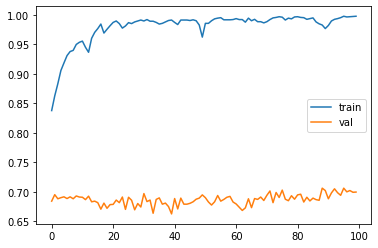

[]
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 0.8211 - acc: 0.8206
Epoch 00001: val_acc improved from 0.71497 to 0.71717, saving model to Model1_checkpoint.h5
78/78 [==============================] - 4s 51ms/step - loss: 0.8132 - acc: 0.8224 - val_loss: 1.2236 - val_acc: 0.7172
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.3600 - acc: 0.8933
Epoch 00002: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 50ms/step - loss: 0.3571 - acc: 0.8943 - val_loss: 1.0953 - val_acc: 0.7131
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.2489 - acc: 0.9209
Epoch 00003: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 47ms/step - loss: 0.2473 - acc: 0.9217 - val_loss: 1.1221 - val_acc: 0.6970
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.1946 - acc: 0.9379
Epoch 00004: val_acc did not improve from 0.71717
78/78 [============================

77/78 [============================>.] - ETA: 0s - loss: 0.0178 - acc: 0.9939
Epoch 00032: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 47ms/step - loss: 0.0176 - acc: 0.9940 - val_loss: 2.0080 - val_acc: 0.6621
Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9943
Epoch 00033: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 47ms/step - loss: 0.0165 - acc: 0.9944 - val_loss: 2.0347 - val_acc: 0.6673
Epoch 34/100
77/78 [============================>.] - ETA: 0s - loss: 0.0120 - acc: 0.9968
Epoch 00034: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 50ms/step - loss: 0.0120 - acc: 0.9968 - val_loss: 2.1188 - val_acc: 0.6603
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.0147 - acc: 0.9947
Epoch 00035: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 50ms/step - loss: 0.0146 - acc: 0.9948 - val_

Epoch 64/100
77/78 [============================>.] - ETA: 0s - loss: 0.0143 - acc: 0.9959
Epoch 00064: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 48ms/step - loss: 0.0143 - acc: 0.9960 - val_loss: 2.3727 - val_acc: 0.6533
Epoch 65/100
77/78 [============================>.] - ETA: 0s - loss: 0.0182 - acc: 0.9947
Epoch 00065: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 46ms/step - loss: 0.0181 - acc: 0.9948 - val_loss: 2.4496 - val_acc: 0.6563
Epoch 66/100
77/78 [============================>.] - ETA: 0s - loss: 0.0096 - acc: 0.9968
Epoch 00066: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 51ms/step - loss: 0.0096 - acc: 0.9968 - val_loss: 2.4065 - val_acc: 0.6585
Epoch 67/100
77/78 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.9976
Epoch 00067: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 50ms/step - loss: 0.0090 - acc: 

Epoch 96/100
77/78 [============================>.] - ETA: 0s - loss: 0.0220 - acc: 0.9943
Epoch 00096: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 50ms/step - loss: 0.0218 - acc: 0.9944 - val_loss: 2.5870 - val_acc: 0.6665
Epoch 97/100
77/78 [============================>.] - ETA: 0s - loss: 0.0192 - acc: 0.9935
Epoch 00097: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 50ms/step - loss: 0.0190 - acc: 0.9936 - val_loss: 2.5273 - val_acc: 0.6717
Epoch 98/100
77/78 [============================>.] - ETA: 0s - loss: 0.0105 - acc: 0.9972
Epoch 00098: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 46ms/step - loss: 0.0104 - acc: 0.9972 - val_loss: 2.7042 - val_acc: 0.6695
Epoch 99/100
77/78 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9854
Epoch 00099: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 47ms/step - loss: 0.0493 - acc: 

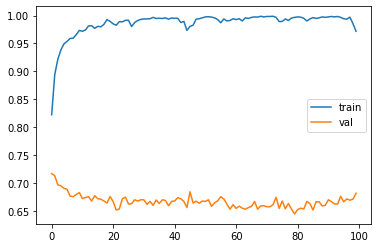

[]
Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 0.8407 - acc: 0.7591
Epoch 00001: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.8407 - acc: 0.7591 - val_loss: 1.1835 - val_acc: 0.7043
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.4030 - acc: 0.8229
Epoch 00002: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 45ms/step - loss: 0.4030 - acc: 0.8229 - val_loss: 1.1121 - val_acc: 0.6867
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.3338 - acc: 0.8479
Epoch 00003: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 47ms/step - loss: 0.3338 - acc: 0.8479 - val_loss: 1.1867 - val_acc: 0.6794
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 0.2675 - acc: 0.8747
Epoch 00004: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.2675 - acc: 0

Epoch 33/100
87/87 [==============================] - ETA: 0s - loss: 0.1182 - acc: 0.9558
Epoch 00033: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 45ms/step - loss: 0.1182 - acc: 0.9558 - val_loss: 2.0606 - val_acc: 0.6288
Epoch 34/100
87/87 [==============================] - ETA: 0s - loss: 0.0519 - acc: 0.9801
Epoch 00034: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 47ms/step - loss: 0.0519 - acc: 0.9801 - val_loss: 2.1172 - val_acc: 0.6464
Epoch 35/100
87/87 [==============================] - ETA: 0s - loss: 0.0304 - acc: 0.9895
Epoch 00035: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0304 - acc: 0.9895 - val_loss: 2.1796 - val_acc: 0.6423
Epoch 36/100
87/87 [==============================] - ETA: 0s - loss: 0.0218 - acc: 0.9920
Epoch 00036: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0218 - acc: 

Epoch 65/100
87/87 [==============================] - ETA: 0s - loss: 0.0153 - acc: 0.9949
Epoch 00065: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0153 - acc: 0.9949 - val_loss: 2.6179 - val_acc: 0.6379
Epoch 66/100
87/87 [==============================] - ETA: 0s - loss: 0.0364 - acc: 0.9902
Epoch 00066: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0364 - acc: 0.9902 - val_loss: 2.4119 - val_acc: 0.6548
Epoch 67/100
87/87 [==============================] - ETA: 0s - loss: 0.0594 - acc: 0.9880
Epoch 00067: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 45ms/step - loss: 0.0594 - acc: 0.9880 - val_loss: 2.4777 - val_acc: 0.6467
Epoch 68/100
87/87 [==============================] - ETA: 0s - loss: 0.0140 - acc: 0.9953
Epoch 00068: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 47ms/step - loss: 0.0140 - acc: 

Epoch 97/100
87/87 [==============================] - ETA: 0s - loss: 0.0215 - acc: 0.9917
Epoch 00097: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 45ms/step - loss: 0.0215 - acc: 0.9917 - val_loss: 2.4695 - val_acc: 0.6588
Epoch 98/100
87/87 [==============================] - ETA: 0s - loss: 0.0111 - acc: 0.9960
Epoch 00098: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 47ms/step - loss: 0.0111 - acc: 0.9960 - val_loss: 2.6088 - val_acc: 0.6566
Epoch 99/100
87/87 [==============================] - ETA: 0s - loss: 0.0194 - acc: 0.9920
Epoch 00099: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 48ms/step - loss: 0.0194 - acc: 0.9920 - val_loss: 2.7259 - val_acc: 0.6427
Epoch 100/100
87/87 [==============================] - ETA: 0s - loss: 0.0803 - acc: 0.9794
Epoch 00100: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 48ms/step - loss: 0.0803 - acc:

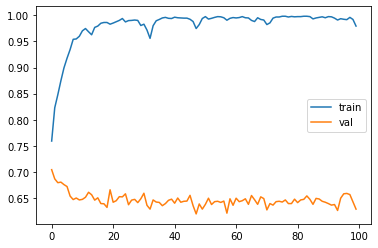

[]
Epoch 1/100
77/77 [==============================] - ETA: 0s - loss: 1.2987 - acc: 0.6030
Epoch 00001: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 1.2987 - acc: 0.6030 - val_loss: 0.9265 - val_acc: 0.6746
Epoch 2/100
77/77 [==============================] - ETA: 0s - loss: 0.7595 - acc: 0.6063
Epoch 00002: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 46ms/step - loss: 0.7595 - acc: 0.6063 - val_loss: 0.9013 - val_acc: 0.6233
Epoch 3/100
77/77 [==============================] - ETA: 0s - loss: 0.6253 - acc: 0.6819
Epoch 00003: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 47ms/step - loss: 0.6253 - acc: 0.6819 - val_loss: 0.9265 - val_acc: 0.6141
Epoch 4/100
77/77 [==============================] - ETA: 0s - loss: 0.5721 - acc: 0.7176
Epoch 00004: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.5721 - acc: 0

Epoch 33/100
77/77 [==============================] - ETA: 0s - loss: 0.0976 - acc: 0.9589
Epoch 00033: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 47ms/step - loss: 0.0976 - acc: 0.9589 - val_loss: 1.9440 - val_acc: 0.6060
Epoch 34/100
77/77 [==============================] - ETA: 0s - loss: 0.1084 - acc: 0.9511
Epoch 00034: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 46ms/step - loss: 0.1084 - acc: 0.9511 - val_loss: 1.9060 - val_acc: 0.6163
Epoch 35/100
77/77 [==============================] - ETA: 0s - loss: 0.1330 - acc: 0.9417
Epoch 00035: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.1330 - acc: 0.9417 - val_loss: 1.8587 - val_acc: 0.6141
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 0.1281 - acc: 0.9470
Epoch 00036: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.1281 - acc: 

Epoch 65/100
77/77 [==============================] - ETA: 0s - loss: 0.0459 - acc: 0.9823
Epoch 00065: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 49ms/step - loss: 0.0459 - acc: 0.9823 - val_loss: 2.2598 - val_acc: 0.6049
Epoch 66/100
77/77 [==============================] - ETA: 0s - loss: 0.0364 - acc: 0.9869
Epoch 00066: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.0364 - acc: 0.9869 - val_loss: 2.3783 - val_acc: 0.5891
Epoch 67/100
77/77 [==============================] - ETA: 0s - loss: 0.0366 - acc: 0.9865
Epoch 00067: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.0366 - acc: 0.9865 - val_loss: 2.3315 - val_acc: 0.6027
Epoch 68/100
77/77 [==============================] - ETA: 0s - loss: 0.0411 - acc: 0.9852
Epoch 00068: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.0411 - acc: 

Epoch 97/100
77/77 [==============================] - ETA: 0s - loss: 0.0150 - acc: 0.9955
Epoch 00097: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 48ms/step - loss: 0.0150 - acc: 0.9955 - val_loss: 2.3805 - val_acc: 0.6005
Epoch 98/100
77/77 [==============================] - ETA: 0s - loss: 0.0151 - acc: 0.9951
Epoch 00098: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.0151 - acc: 0.9951 - val_loss: 2.3913 - val_acc: 0.6038
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 0.0156 - acc: 0.9947
Epoch 00099: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.0156 - acc: 0.9947 - val_loss: 2.4124 - val_acc: 0.6214
Epoch 100/100
77/77 [==============================] - ETA: 0s - loss: 0.0175 - acc: 0.9938
Epoch 00100: val_acc did not improve from 0.71717
77/77 [==============================] - 4s 50ms/step - loss: 0.0175 - acc:

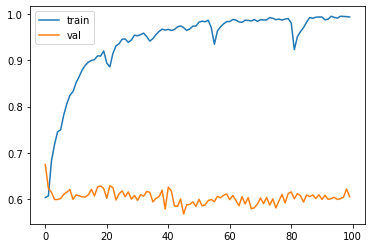

[]
Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 0.5714 - acc: 0.8888
Epoch 00001: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 45ms/step - loss: 0.5714 - acc: 0.8888 - val_loss: 1.5882 - val_acc: 0.7051
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.2837 - acc: 0.9192
Epoch 00002: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 46ms/step - loss: 0.2837 - acc: 0.9192 - val_loss: 1.3798 - val_acc: 0.7036
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.2234 - acc: 0.9283
Epoch 00003: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.2234 - acc: 0.9283 - val_loss: 1.3489 - val_acc: 0.7025
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 0.1881 - acc: 0.9431
Epoch 00004: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 50ms/step - loss: 0.1881 - acc: 0

Epoch 33/100
87/87 [==============================] - ETA: 0s - loss: 0.0926 - acc: 0.9743
Epoch 00033: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0926 - acc: 0.9743 - val_loss: 1.9019 - val_acc: 0.6875
Epoch 34/100
87/87 [==============================] - ETA: 0s - loss: 0.0559 - acc: 0.9815
Epoch 00034: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0559 - acc: 0.9815 - val_loss: 1.8462 - val_acc: 0.6908
Epoch 35/100
87/87 [==============================] - ETA: 0s - loss: 0.0251 - acc: 0.9909
Epoch 00035: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0251 - acc: 0.9909 - val_loss: 1.9071 - val_acc: 0.6820
Epoch 36/100
86/87 [============================>.] - ETA: 0s - loss: 0.0156 - acc: 0.9960
Epoch 00036: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 46ms/step - loss: 0.0155 - acc: 

Epoch 65/100
87/87 [==============================] - ETA: 0s - loss: 0.0522 - acc: 0.9862
Epoch 00065: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 51ms/step - loss: 0.0522 - acc: 0.9862 - val_loss: 2.3610 - val_acc: 0.6878
Epoch 66/100
87/87 [==============================] - ETA: 0s - loss: 0.0358 - acc: 0.9848
Epoch 00066: val_acc did not improve from 0.71717
87/87 [==============================] - 5s 53ms/step - loss: 0.0358 - acc: 0.9848 - val_loss: 2.2360 - val_acc: 0.6849
Epoch 67/100
87/87 [==============================] - ETA: 0s - loss: 0.0575 - acc: 0.9819
Epoch 00067: val_acc did not improve from 0.71717
87/87 [==============================] - 5s 52ms/step - loss: 0.0575 - acc: 0.9819 - val_loss: 2.0875 - val_acc: 0.6753
Epoch 68/100
87/87 [==============================] - ETA: 0s - loss: 0.0576 - acc: 0.9815
Epoch 00068: val_acc did not improve from 0.71717
87/87 [==============================] - 5s 54ms/step - loss: 0.0576 - acc: 

87/87 [==============================] - ETA: 0s - loss: 0.0972 - acc: 0.9768
Epoch 00096: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 49ms/step - loss: 0.0972 - acc: 0.9768 - val_loss: 2.2774 - val_acc: 0.6787
Epoch 97/100
87/87 [==============================] - ETA: 0s - loss: 0.0771 - acc: 0.9779
Epoch 00097: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 46ms/step - loss: 0.0771 - acc: 0.9779 - val_loss: 2.0830 - val_acc: 0.6886
Epoch 98/100
87/87 [==============================] - ETA: 0s - loss: 0.0911 - acc: 0.9717
Epoch 00098: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 47ms/step - loss: 0.0911 - acc: 0.9717 - val_loss: 1.9248 - val_acc: 0.6856
Epoch 99/100
87/87 [==============================] - ETA: 0s - loss: 0.0586 - acc: 0.9761
Epoch 00099: val_acc did not improve from 0.71717
87/87 [==============================] - 4s 50ms/step - loss: 0.0586 - acc: 0.9761 - val_

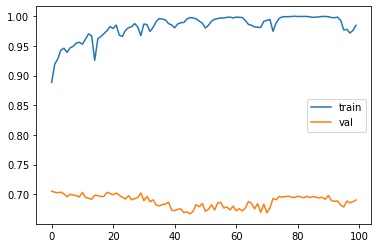

[]
Epoch 1/100
78/78 [==============================] - ETA: 0s - loss: 0.5449 - acc: 0.8566
Epoch 00001: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 53ms/step - loss: 0.5449 - acc: 0.8566 - val_loss: 1.3729 - val_acc: 0.6992
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.3382 - acc: 0.8904
Epoch 00002: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 51ms/step - loss: 0.3411 - acc: 0.8895 - val_loss: 1.1893 - val_acc: 0.6827
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.2545 - acc: 0.9123
Epoch 00003: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 53ms/step - loss: 0.2594 - acc: 0.9112 - val_loss: 1.1132 - val_acc: 0.6867
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.2031 - acc: 0.9261
Epoch 00004: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 53ms/step - loss: 0.2058 - acc: 0

Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0464 - acc: 0.9813
Epoch 00033: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 56ms/step - loss: 0.0474 - acc: 0.9807 - val_loss: 2.0048 - val_acc: 0.6643
Epoch 34/100
78/78 [==============================] - ETA: 0s - loss: 0.0538 - acc: 0.9811
Epoch 00034: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 57ms/step - loss: 0.0538 - acc: 0.9811 - val_loss: 1.9045 - val_acc: 0.6662
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.0326 - acc: 0.9890
Epoch 00035: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 56ms/step - loss: 0.0324 - acc: 0.9892 - val_loss: 1.9182 - val_acc: 0.6864
Epoch 36/100
78/78 [==============================] - ETA: 0s - loss: 0.0250 - acc: 0.9904
Epoch 00036: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 57ms/step - loss: 0.0250 - acc: 

Epoch 65/100
77/78 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9935
Epoch 00065: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 56ms/step - loss: 0.0154 - acc: 0.9936 - val_loss: 2.2823 - val_acc: 0.6772
Epoch 66/100
77/78 [============================>.] - ETA: 0s - loss: 0.0157 - acc: 0.9947
Epoch 00066: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0159 - acc: 0.9948 - val_loss: 2.2248 - val_acc: 0.6750
Epoch 67/100
77/78 [============================>.] - ETA: 0s - loss: 0.0123 - acc: 0.9959
Epoch 00067: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0124 - acc: 0.9960 - val_loss: 2.3019 - val_acc: 0.6801
Epoch 68/100
78/78 [==============================] - ETA: 0s - loss: 0.0118 - acc: 0.9972- ETA: 1s - loss: 0.0132 -
Epoch 00068: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/s

77/78 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.9984
Epoch 00096: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 57ms/step - loss: 0.0062 - acc: 0.9984 - val_loss: 2.3404 - val_acc: 0.6636
Epoch 97/100
78/78 [==============================] - ETA: 0s - loss: 0.0091 - acc: 0.9964
Epoch 00097: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0091 - acc: 0.9964 - val_loss: 2.3579 - val_acc: 0.6717
Epoch 98/100
78/78 [==============================] - ETA: 0s - loss: 0.0043 - acc: 0.9992
Epoch 00098: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 56ms/step - loss: 0.0043 - acc: 0.9992 - val_loss: 2.3985 - val_acc: 0.6673
Epoch 99/100
77/78 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.9955
Epoch 00099: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0091 - acc: 0.9956 - val_

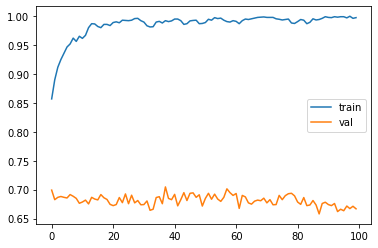

[]
Epoch 1/100
91/91 [==============================] - ETA: 0s - loss: 1.2740 - acc: 0.6506
Epoch 00001: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 54ms/step - loss: 1.2740 - acc: 0.6506 - val_loss: 0.8812 - val_acc: 0.6497
Epoch 2/100
91/91 [==============================] - ETA: 0s - loss: 0.6460 - acc: 0.7271
Epoch 00002: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 53ms/step - loss: 0.6460 - acc: 0.7271 - val_loss: 0.8257 - val_acc: 0.6515
Epoch 3/100
91/91 [==============================] - ETA: 0s - loss: 0.5618 - acc: 0.7666
Epoch 00003: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 59ms/step - loss: 0.5618 - acc: 0.7666 - val_loss: 0.8154 - val_acc: 0.6588
Epoch 4/100
90/91 [============================>.] - ETA: 0s - loss: 0.4828 - acc: 0.7806
Epoch 00004: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 59ms/step - loss: 0.4818 - acc: 0

Epoch 33/100
91/91 [==============================] - ETA: 0s - loss: 0.0533 - acc: 0.9830
Epoch 00033: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 58ms/step - loss: 0.0533 - acc: 0.9830 - val_loss: 1.8007 - val_acc: 0.6504
Epoch 34/100
91/91 [==============================] - ETA: 0s - loss: 0.0646 - acc: 0.9796
Epoch 00034: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 57ms/step - loss: 0.0646 - acc: 0.9796 - val_loss: 1.8258 - val_acc: 0.6376
Epoch 35/100
90/91 [============================>.] - ETA: 0s - loss: 0.0923 - acc: 0.9694
Epoch 00035: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 57ms/step - loss: 0.0921 - acc: 0.9695 - val_loss: 1.7770 - val_acc: 0.6277
Epoch 36/100
90/91 [============================>.] - ETA: 0s - loss: 0.1285 - acc: 0.9576
Epoch 00036: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 54ms/step - loss: 0.1282 - acc: 

90/91 [============================>.] - ETA: 0s - loss: 0.0547 - acc: 0.9833
Epoch 00064: val_acc did not improve from 0.71717
91/91 [==============================] - 4s 49ms/step - loss: 0.0546 - acc: 0.9834 - val_loss: 1.8349 - val_acc: 0.6530
Epoch 65/100
91/91 [==============================] - ETA: 0s - loss: 0.0422 - acc: 0.9837
Epoch 00065: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 49ms/step - loss: 0.0422 - acc: 0.9837 - val_loss: 1.9269 - val_acc: 0.6662
Epoch 66/100
91/91 [==============================] - ETA: 0s - loss: 0.0365 - acc: 0.9886
Epoch 00066: val_acc did not improve from 0.71717
91/91 [==============================] - 4s 49ms/step - loss: 0.0365 - acc: 0.9886 - val_loss: 1.8183 - val_acc: 0.6475
Epoch 67/100
91/91 [==============================] - ETA: 0s - loss: 0.0294 - acc: 0.9903
Epoch 00067: val_acc did not improve from 0.71717
91/91 [==============================] - 4s 46ms/step - loss: 0.0294 - acc: 0.9903 - val_

Epoch 96/100
91/91 [==============================] - ETA: 0s - loss: 0.0128 - acc: 0.9955
Epoch 00096: val_acc did not improve from 0.71717
91/91 [==============================] - 4s 49ms/step - loss: 0.0128 - acc: 0.9955 - val_loss: 2.2310 - val_acc: 0.6423
Epoch 97/100
91/91 [==============================] - ETA: 0s - loss: 0.0147 - acc: 0.9958
Epoch 00097: val_acc did not improve from 0.71717
91/91 [==============================] - 5s 50ms/step - loss: 0.0147 - acc: 0.9958 - val_loss: 2.2761 - val_acc: 0.6357
Epoch 98/100
91/91 [==============================] - ETA: 0s - loss: 0.0129 - acc: 0.9945
Epoch 00098: val_acc did not improve from 0.71717
91/91 [==============================] - 4s 49ms/step - loss: 0.0129 - acc: 0.9945 - val_loss: 2.2839 - val_acc: 0.6453
Epoch 99/100
91/91 [==============================] - ETA: 0s - loss: 0.0106 - acc: 0.9965
Epoch 00099: val_acc did not improve from 0.71717
91/91 [==============================] - 4s 49ms/step - loss: 0.0106 - acc: 

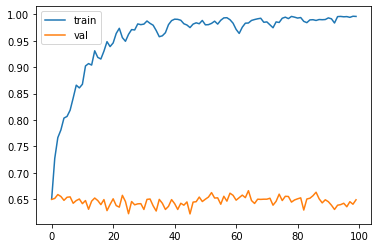

[]
Epoch 1/100
81/81 [==============================] - ETA: 0s - loss: 1.1276 - acc: 0.7384
Epoch 00001: val_acc did not improve from 0.71717
81/81 [==============================] - 3s 42ms/step - loss: 1.1276 - acc: 0.7384 - val_loss: 1.0078 - val_acc: 0.6680
Epoch 2/100
81/81 [==============================] - ETA: 0s - loss: 0.4932 - acc: 0.8029
Epoch 00002: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 44ms/step - loss: 0.4932 - acc: 0.8029 - val_loss: 0.8410 - val_acc: 0.6864
Epoch 3/100
81/81 [==============================] - ETA: 0s - loss: 0.4151 - acc: 0.8237
Epoch 00003: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 45ms/step - loss: 0.4151 - acc: 0.8237 - val_loss: 0.8694 - val_acc: 0.6823
Epoch 4/100
81/81 [==============================] - ETA: 0s - loss: 0.3457 - acc: 0.8565
Epoch 00004: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 47ms/step - loss: 0.3457 - acc: 0

81/81 [==============================] - ETA: 0s - loss: 0.0228 - acc: 0.9923
Epoch 00032: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 45ms/step - loss: 0.0228 - acc: 0.9923 - val_loss: 1.8977 - val_acc: 0.6985
Epoch 33/100
81/81 [==============================] - ETA: 0s - loss: 0.0301 - acc: 0.9892
Epoch 00033: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 45ms/step - loss: 0.0301 - acc: 0.9892 - val_loss: 1.9294 - val_acc: 0.6849
Epoch 34/100
81/81 [==============================] - ETA: 0s - loss: 0.0313 - acc: 0.9880
Epoch 00034: val_acc did not improve from 0.71717
81/81 [==============================] - 3s 42ms/step - loss: 0.0313 - acc: 0.9880 - val_loss: 1.9243 - val_acc: 0.6941
Epoch 35/100
81/81 [==============================] - ETA: 0s - loss: 0.0268 - acc: 0.9911
Epoch 00035: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 44ms/step - loss: 0.0268 - acc: 0.9911 - val_

81/81 [==============================] - ETA: 0s - loss: 0.0540 - acc: 0.9842
Epoch 00063: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 46ms/step - loss: 0.0540 - acc: 0.9842 - val_loss: 1.9624 - val_acc: 0.7087
Epoch 64/100
81/81 [==============================] - ETA: 0s - loss: 0.0257 - acc: 0.9904
Epoch 00064: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 46ms/step - loss: 0.0257 - acc: 0.9904 - val_loss: 2.0535 - val_acc: 0.7102
Epoch 65/100
81/81 [==============================] - ETA: 0s - loss: 0.0210 - acc: 0.9911
Epoch 00065: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 55ms/step - loss: 0.0210 - acc: 0.9911 - val_loss: 1.9921 - val_acc: 0.7069
Epoch 66/100
81/81 [==============================] - ETA: 0s - loss: 0.0227 - acc: 0.9931
Epoch 00066: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 51ms/step - loss: 0.0227 - acc: 0.9931 - val_

Epoch 95/100
81/81 [==============================] - ETA: 0s - loss: 0.0236 - acc: 0.9923
Epoch 00095: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 49ms/step - loss: 0.0236 - acc: 0.9923 - val_loss: 2.1688 - val_acc: 0.6992
Epoch 96/100
81/81 [==============================] - ETA: 0s - loss: 0.0315 - acc: 0.9907
Epoch 00096: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 49ms/step - loss: 0.0315 - acc: 0.9907 - val_loss: 2.2509 - val_acc: 0.7073
Epoch 97/100
81/81 [==============================] - ETA: 0s - loss: 0.0269 - acc: 0.9915
Epoch 00097: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 48ms/step - loss: 0.0269 - acc: 0.9915 - val_loss: 2.1426 - val_acc: 0.6981
Epoch 98/100
81/81 [==============================] - ETA: 0s - loss: 0.0098 - acc: 0.9969
Epoch 00098: val_acc did not improve from 0.71717
81/81 [==============================] - 4s 50ms/step - loss: 0.0098 - acc: 

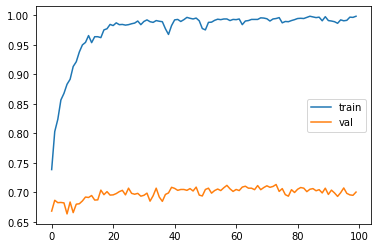

[]
Epoch 1/100
92/93 [============================>.] - ETA: 0s - loss: 0.9047 - acc: 0.7785- ETA: 1s - los
Epoch 00001: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 55ms/step - loss: 0.8971 - acc: 0.7805 - val_loss: 1.0889 - val_acc: 0.7128
Epoch 2/100
92/93 [============================>.] - ETA: 0s - loss: 0.4968 - acc: 0.8393
Epoch 00002: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 53ms/step - loss: 0.4929 - acc: 0.8407 - val_loss: 0.9250 - val_acc: 0.7135
Epoch 3/100
93/93 [==============================] - ETA: 0s - loss: 0.3299 - acc: 0.8704
Epoch 00003: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 53ms/step - loss: 0.3299 - acc: 0.8704 - val_loss: 0.9331 - val_acc: 0.7054
Epoch 4/100
93/93 [==============================] - ETA: 0s - loss: 0.2767 - acc: 0.8869
Epoch 00004: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 54ms/step - loss: 

92/93 [============================>.] - ETA: 0s - loss: 0.0200 - acc: 0.9935
Epoch 00032: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 53ms/step - loss: 0.0199 - acc: 0.9936 - val_loss: 2.1932 - val_acc: 0.6680
Epoch 33/100
93/93 [==============================] - ETA: 0s - loss: 0.0228 - acc: 0.9929
Epoch 00033: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 53ms/step - loss: 0.0228 - acc: 0.9929 - val_loss: 2.2217 - val_acc: 0.6761
Epoch 34/100
93/93 [==============================] - ETA: 0s - loss: 0.0193 - acc: 0.9943
Epoch 00034: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 54ms/step - loss: 0.0193 - acc: 0.9943 - val_loss: 2.2152 - val_acc: 0.6669
Epoch 35/100
92/93 [============================>.] - ETA: 0s - loss: 0.0162 - acc: 0.9946
Epoch 00035: val_acc did not improve from 0.71717
93/93 [==============================] - 5s 54ms/step - loss: 0.0161 - acc: 0.9946 - val_

93/93 [==============================] - ETA: 0s - loss: 0.0269 - acc: 0.9933- ETA: 0s - loss: 0.0282 - acc: 0
Epoch 00063: val_acc did not improve from 0.71717
93/93 [==============================] - 7s 80ms/step - loss: 0.0269 - acc: 0.9933 - val_loss: 2.4952 - val_acc: 0.6566
Epoch 64/100
92/93 [============================>.] - ETA: 0s - loss: 0.0511 - acc: 0.9854- ETA: 2s - l
Epoch 00064: val_acc did not improve from 0.71717
93/93 [==============================] - 6s 64ms/step - loss: 0.0507 - acc: 0.9855 - val_loss: 2.1507 - val_acc: 0.6614
Epoch 65/100
92/93 [============================>.] - ETA: 0s - loss: 0.0262 - acc: 0.9918
Epoch 00065: val_acc did not improve from 0.71717
93/93 [==============================] - 6s 66ms/step - loss: 0.0260 - acc: 0.9919 - val_loss: 2.4700 - val_acc: 0.6735
Epoch 66/100
93/93 [==============================] - ETA: 0s - loss: 0.0188 - acc: 0.9933
Epoch 00066: val_acc did not improve from 0.71717
93/93 [==============================] - 7s

Epoch 94/100
93/93 [==============================] - ETA: 0s - loss: 0.0109 - acc: 0.9970
Epoch 00094: val_acc did not improve from 0.71717
93/93 [==============================] - 9s 92ms/step - loss: 0.0109 - acc: 0.9970 - val_loss: 2.5093 - val_acc: 0.6761
Epoch 95/100
93/93 [==============================] - ETA: 0s - loss: 0.0196 - acc: 0.9943
Epoch 00095: val_acc did not improve from 0.71717
93/93 [==============================] - 7s 77ms/step - loss: 0.0196 - acc: 0.9943 - val_loss: 2.5152 - val_acc: 0.6713
Epoch 96/100
93/93 [==============================] - ETA: 0s - loss: 0.0279 - acc: 0.9902
Epoch 00096: val_acc did not improve from 0.71717
93/93 [==============================] - 9s 92ms/step - loss: 0.0279 - acc: 0.9902 - val_loss: 2.3770 - val_acc: 0.6794
Epoch 97/100
93/93 [==============================] - ETA: 0s - loss: 0.0199 - acc: 0.9933
Epoch 00097: val_acc did not improve from 0.71717
93/93 [==============================] - 7s 77ms/step - loss: 0.0199 - acc: 

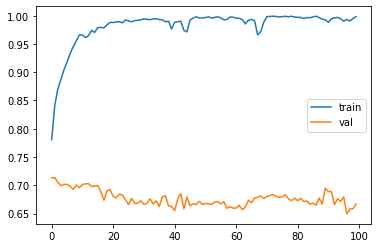

[]
Epoch 1/100
78/78 [==============================] - ETA: 0s - loss: 1.4224 - acc: 0.6472
Epoch 00001: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 76ms/step - loss: 1.4224 - acc: 0.6472 - val_loss: 1.2833 - val_acc: 0.6350
Epoch 2/100
78/78 [==============================] - ETA: 0s - loss: 0.7160 - acc: 0.6878
Epoch 00002: val_acc did not improve from 0.71717
78/78 [==============================] - 8s 102ms/step - loss: 0.7160 - acc: 0.6878 - val_loss: 1.1414 - val_acc: 0.6427
Epoch 3/100
78/78 [==============================] - ETA: 0s - loss: 0.5560 - acc: 0.7505
Epoch 00003: val_acc did not improve from 0.71717
78/78 [==============================] - 7s 87ms/step - loss: 0.5560 - acc: 0.7505 - val_loss: 1.1559 - val_acc: 0.6442
Epoch 4/100
78/78 [==============================] - ETA: 0s - loss: 0.5020 - acc: 0.7634
Epoch 00004: val_acc did not improve from 0.71717
78/78 [==============================] - 8s 107ms/step - loss: 0.5020 - acc:

78/78 [==============================] - ETA: 0s - loss: 0.0655 - acc: 0.9775
Epoch 00032: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 76ms/step - loss: 0.0655 - acc: 0.9775 - val_loss: 2.3186 - val_acc: 0.6445
Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0691 - acc: 0.9761- ETA: 1
Epoch 00033: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 78ms/step - loss: 0.0684 - acc: 0.9763 - val_loss: 2.3186 - val_acc: 0.6420
Epoch 34/100
78/78 [==============================] - ETA: 0s - loss: 0.0450 - acc: 0.9859
Epoch 00034: val_acc did not improve from 0.71717
78/78 [==============================] - 8s 98ms/step - loss: 0.0450 - acc: 0.9859 - val_loss: 2.4121 - val_acc: 0.6266
Epoch 35/100
78/78 [==============================] - ETA: 0s - loss: 0.0352 - acc: 0.9888- ETA: 0s - loss: 0.0363 - acc: 0.
Epoch 00035: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 79m

78/78 [==============================] - ETA: 0s - loss: 0.0505 - acc: 0.9843
Epoch 00063: val_acc did not improve from 0.71717
78/78 [==============================] - 7s 86ms/step - loss: 0.0505 - acc: 0.9843 - val_loss: 2.4679 - val_acc: 0.6324
Epoch 64/100
78/78 [==============================] - ETA: 0s - loss: 0.0520 - acc: 0.9831- 
Epoch 00064: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 79ms/step - loss: 0.0520 - acc: 0.9831 - val_loss: 2.3912 - val_acc: 0.6508
Epoch 65/100
78/78 [==============================] - ETA: 0s - loss: 0.0154 - acc: 0.9968- ETA: 2
Epoch 00065: val_acc did not improve from 0.71717
78/78 [==============================] - 8s 97ms/step - loss: 0.0154 - acc: 0.9968 - val_loss: 2.4411 - val_acc: 0.6434
Epoch 66/100
78/78 [==============================] - ETA: 0s - loss: 0.0172 - acc: 0.9944
Epoch 00066: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 76ms/step - loss: 0.0172 - acc: 0.9

78/78 [==============================] - ETA: 0s - loss: 0.0603 - acc: 0.9775
Epoch 00094: val_acc did not improve from 0.71717
78/78 [==============================] - 7s 87ms/step - loss: 0.0603 - acc: 0.9775 - val_loss: 2.3513 - val_acc: 0.6324
Epoch 95/100
78/78 [==============================] - ETA: 0s - loss: 0.0200 - acc: 0.9952
Epoch 00095: val_acc did not improve from 0.71717
78/78 [==============================] - 5s 70ms/step - loss: 0.0200 - acc: 0.9952 - val_loss: 2.4070 - val_acc: 0.6398
Epoch 96/100
78/78 [==============================] - ETA: 0s - loss: 0.0152 - acc: 0.9956
Epoch 00096: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 73ms/step - loss: 0.0152 - acc: 0.9956 - val_loss: 2.5031 - val_acc: 0.6368
Epoch 97/100
78/78 [==============================] - ETA: 0s - loss: 0.0119 - acc: 0.9976
Epoch 00097: val_acc did not improve from 0.71717
78/78 [==============================] - 7s 96ms/step - loss: 0.0119 - acc: 0.9976 - val_

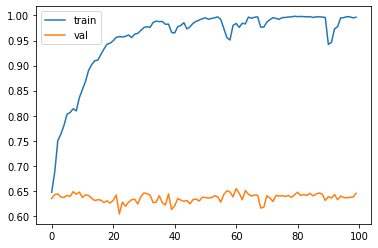

[]
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 1.0858 - acc: 0.7662
Epoch 00001: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 72ms/step - loss: 1.0787 - acc: 0.7670 - val_loss: 1.0636 - val_acc: 0.6944
Epoch 2/100
77/78 [============================>.] - ETA: 0s - loss: 0.4708 - acc: 0.8470
Epoch 00002: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 78ms/step - loss: 0.4693 - acc: 0.8485 - val_loss: 0.9387 - val_acc: 0.6878
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.3478 - acc: 0.8795
Epoch 00003: val_acc did not improve from 0.71717
78/78 [==============================] - 5s 65ms/step - loss: 0.3470 - acc: 0.8807 - val_loss: 0.9074 - val_acc: 0.6809
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.3009 - acc: 0.8904
Epoch 00004: val_acc did not improve from 0.71717
78/78 [==============================] - 6s 81ms/step - loss: 0.3002 - acc: 0

Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9834
Epoch 00033: val_acc did not improve from 0.71717
78/78 [==============================] - 5s 68ms/step - loss: 0.0488 - acc: 0.9835 - val_loss: 2.0205 - val_acc: 0.6845
Epoch 34/100
77/78 [============================>.] - ETA: 0s - loss: 0.0609 - acc: 0.9789- ETA: 0s - loss: 0.0718 - a
Epoch 00034: val_acc did not improve from 0.71717
78/78 [==============================] - 5s 65ms/step - loss: 0.0603 - acc: 0.9791 - val_loss: 1.8971 - val_acc: 0.6731
Epoch 35/100
78/78 [==============================] - ETA: 0s - loss: 0.0574 - acc: 0.9787
Epoch 00035: val_acc did not improve from 0.71717
78/78 [==============================] - 7s 85ms/step - loss: 0.0574 - acc: 0.9787 - val_loss: 1.8539 - val_acc: 0.6831
Epoch 36/100
77/78 [============================>.] - ETA: 0s - loss: 0.0322 - acc: 0.9862
Epoch 00036: val_acc did not improve from 0.71717
78/78 [==============================] - 5s 66ms

Epoch 64/100
78/78 [==============================] - ETA: 0s - loss: 0.0114 - acc: 0.9960
Epoch 00064: val_acc did not improve from 0.71717
78/78 [==============================] - 9s 113ms/step - loss: 0.0114 - acc: 0.9960 - val_loss: 2.3727 - val_acc: 0.6823
Epoch 65/100
78/78 [==============================] - ETA: 0s - loss: 0.0139 - acc: 0.9948
Epoch 00065: val_acc did not improve from 0.71717
78/78 [==============================] - 9s 121ms/step - loss: 0.0139 - acc: 0.9948 - val_loss: 2.3849 - val_acc: 0.6731
Epoch 66/100
78/78 [==============================] - ETA: 0s - loss: 0.0109 - acc: 0.9956
Epoch 00066: val_acc did not improve from 0.71717
78/78 [==============================] - 9s 116ms/step - loss: 0.0109 - acc: 0.9956 - val_loss: 2.4483 - val_acc: 0.6812
Epoch 67/100
78/78 [==============================] - ETA: 0s - loss: 0.0166 - acc: 0.9952
Epoch 00067: val_acc did not improve from 0.71717
78/78 [==============================] - 8s 96ms/step - loss: 0.0166 - ac

78/78 [==============================] - ETA: 0s - loss: 0.0136 - acc: 0.9952
Epoch 00095: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0136 - acc: 0.9952 - val_loss: 2.5101 - val_acc: 0.6709
Epoch 96/100
78/78 [==============================] - ETA: 0s - loss: 0.0103 - acc: 0.9972
Epoch 00096: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0103 - acc: 0.9972 - val_loss: 2.5291 - val_acc: 0.6724
Epoch 97/100
77/78 [============================>.] - ETA: 0s - loss: 0.0121 - acc: 0.9968
Epoch 00097: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 56ms/step - loss: 0.0120 - acc: 0.9968 - val_loss: 2.4826 - val_acc: 0.6724
Epoch 98/100
78/78 [==============================] - ETA: 0s - loss: 0.0078 - acc: 0.9976
Epoch 00098: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0078 - acc: 0.9976 - val_

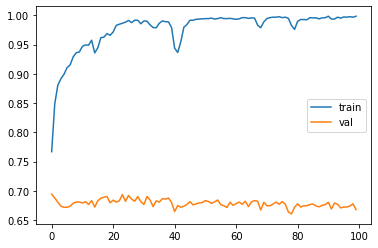

[]
Epoch 1/100
87/88 [============================>.] - ETA: 0s - loss: 0.8629 - acc: 0.8193
Epoch 00001: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 52ms/step - loss: 0.8602 - acc: 0.8192 - val_loss: 1.5796 - val_acc: 0.6955
Epoch 2/100
88/88 [==============================] - ETA: 0s - loss: 0.3525 - acc: 0.9066
Epoch 00002: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 53ms/step - loss: 0.3525 - acc: 0.9066 - val_loss: 1.1610 - val_acc: 0.6882
Epoch 3/100
87/88 [============================>.] - ETA: 0s - loss: 0.2402 - acc: 0.9213
Epoch 00003: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 53ms/step - loss: 0.2387 - acc: 0.9219 - val_loss: 1.2213 - val_acc: 0.6933
Epoch 4/100
88/88 [==============================] - ETA: 0s - loss: 0.1895 - acc: 0.9337
Epoch 00004: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 54ms/step - loss: 0.1895 - acc: 0

87/88 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9946
Epoch 00032: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 59ms/step - loss: 0.0171 - acc: 0.9947 - val_loss: 2.4725 - val_acc: 0.6801
Epoch 33/100
87/88 [============================>.] - ETA: 0s - loss: 0.0106 - acc: 0.9960
Epoch 00033: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 59ms/step - loss: 0.0105 - acc: 0.9961 - val_loss: 2.5166 - val_acc: 0.6687
Epoch 34/100
88/88 [==============================] - ETA: 0s - loss: 0.0157 - acc: 0.9939
Epoch 00034: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 56ms/step - loss: 0.0157 - acc: 0.9939 - val_loss: 2.6196 - val_acc: 0.6787
Epoch 35/100
87/88 [============================>.] - ETA: 0s - loss: 0.0722 - acc: 0.9795- ETA: 0s - loss: 0.0734 - acc: 0.9
Epoch 00035: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 56ms/step 

Epoch 63/100
88/88 [==============================] - ETA: 0s - loss: 0.0284 - acc: 0.9918
Epoch 00063: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 55ms/step - loss: 0.0284 - acc: 0.9918 - val_loss: 2.9113 - val_acc: 0.6809
Epoch 64/100
87/88 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9950- ETA: 1s - loss: 0.
Epoch 00064: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 55ms/step - loss: 0.0117 - acc: 0.9950 - val_loss: 2.9046 - val_acc: 0.6750
Epoch 65/100
87/88 [============================>.] - ETA: 0s - loss: 0.0131 - acc: 0.9957
Epoch 00065: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 54ms/step - loss: 0.0130 - acc: 0.9957 - val_loss: 2.7905 - val_acc: 0.6706
Epoch 66/100
88/88 [==============================] - ETA: 0s - loss: 0.0126 - acc: 0.9968
Epoch 00066: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 54ms/step - 

87/88 [============================>.] - ETA: 0s - loss: 0.0129 - acc: 0.9957
Epoch 00094: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 56ms/step - loss: 0.0129 - acc: 0.9957 - val_loss: 3.0399 - val_acc: 0.6698
Epoch 95/100
87/88 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9982
Epoch 00095: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 52ms/step - loss: 0.0061 - acc: 0.9982 - val_loss: 3.0239 - val_acc: 0.6709
Epoch 96/100
88/88 [==============================] - ETA: 0s - loss: 0.0033 - acc: 0.9989
Epoch 00096: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 56ms/step - loss: 0.0033 - acc: 0.9989 - val_loss: 3.0749 - val_acc: 0.6731
Epoch 97/100
87/88 [============================>.] - ETA: 0s - loss: 0.0042 - acc: 0.9989
Epoch 00097: val_acc did not improve from 0.71717
88/88 [==============================] - 5s 52ms/step - loss: 0.0041 - acc: 0.9989 - val_

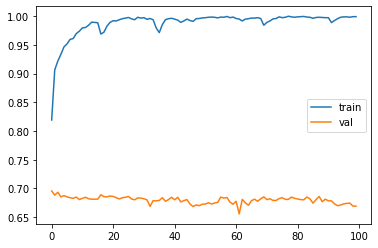

[]
Epoch 1/100
82/82 [==============================] - ETA: 0s - loss: 0.8626 - acc: 0.7825
Epoch 00001: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 53ms/step - loss: 0.8626 - acc: 0.7825 - val_loss: 1.0395 - val_acc: 0.7076
Epoch 2/100
82/82 [==============================] - ETA: 0s - loss: 0.4153 - acc: 0.8527
Epoch 00002: val_acc did not improve from 0.71717
82/82 [==============================] - 5s 55ms/step - loss: 0.4153 - acc: 0.8527 - val_loss: 1.0268 - val_acc: 0.7065
Epoch 3/100
81/82 [============================>.] - ETA: 0s - loss: 0.3276 - acc: 0.8846
Epoch 00003: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 52ms/step - loss: 0.3275 - acc: 0.8847 - val_loss: 1.0612 - val_acc: 0.7131
Epoch 4/100
81/82 [============================>.] - ETA: 0s - loss: 0.3140 - acc: 0.8819
Epoch 00004: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 52ms/step - loss: 0.3139 - acc: 0

Epoch 33/100
81/82 [============================>.] - ETA: 0s - loss: 0.0771 - acc: 0.9738
Epoch 00033: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 47ms/step - loss: 0.0771 - acc: 0.9738 - val_loss: 2.1053 - val_acc: 0.6614
Epoch 34/100
82/82 [==============================] - ETA: 0s - loss: 0.0670 - acc: 0.9772
Epoch 00034: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 49ms/step - loss: 0.0670 - acc: 0.9772 - val_loss: 2.0479 - val_acc: 0.6625
Epoch 35/100
81/82 [============================>.] - ETA: 0s - loss: 0.0368 - acc: 0.9861
Epoch 00035: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 51ms/step - loss: 0.0367 - acc: 0.9861 - val_loss: 2.0906 - val_acc: 0.6794
Epoch 36/100
81/82 [============================>.] - ETA: 0s - loss: 0.0189 - acc: 0.9954
Epoch 00036: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 51ms/step - loss: 0.0189 - acc: 

Epoch 65/100
82/82 [==============================] - ETA: 0s - loss: 0.0290 - acc: 0.9911
Epoch 00065: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 49ms/step - loss: 0.0290 - acc: 0.9911 - val_loss: 2.3500 - val_acc: 0.6801
Epoch 66/100
81/82 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9942
Epoch 00066: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 52ms/step - loss: 0.0153 - acc: 0.9942 - val_loss: 2.4348 - val_acc: 0.6757
Epoch 67/100
82/82 [==============================] - ETA: 0s - loss: 0.0082 - acc: 0.9977
Epoch 00067: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 52ms/step - loss: 0.0082 - acc: 0.9977 - val_loss: 2.4277 - val_acc: 0.6897
Epoch 68/100
81/82 [============================>.] - ETA: 0s - loss: 0.0077 - acc: 0.9961
Epoch 00068: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 52ms/step - loss: 0.0077 - acc: 

Epoch 97/100
81/82 [============================>.] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 00097: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 50ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.8237 - val_acc: 0.6772
Epoch 98/100
82/82 [==============================] - ETA: 0s - loss: 0.0027 - acc: 0.9996
Epoch 00098: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 49ms/step - loss: 0.0027 - acc: 0.9996 - val_loss: 2.8365 - val_acc: 0.6787
Epoch 99/100
81/82 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 0.9985
Epoch 00099: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 51ms/step - loss: 0.0041 - acc: 0.9985 - val_loss: 2.8332 - val_acc: 0.6739
Epoch 100/100
81/82 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9942
Epoch 00100: val_acc did not improve from 0.71717
82/82 [==============================] - 4s 51ms/step - loss: 0.0176 - acc:

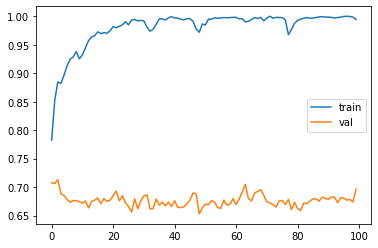

[]
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 1.0795 - acc: 0.7638
Epoch 00001: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 52ms/step - loss: 1.0696 - acc: 0.7662 - val_loss: 1.2173 - val_acc: 0.6981
Epoch 2/100
78/78 [==============================] - ETA: 0s - loss: 0.5106 - acc: 0.8023
Epoch 00002: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 52ms/step - loss: 0.5106 - acc: 0.8023 - val_loss: 1.0652 - val_acc: 0.6977
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.4257 - acc: 0.8263
Epoch 00003: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 49ms/step - loss: 0.4237 - acc: 0.8280 - val_loss: 1.0122 - val_acc: 0.7029
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.3612 - acc: 0.8442
Epoch 00004: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 50ms/step - loss: 0.3596 - acc: 0

Epoch 33/100
77/78 [============================>.] - ETA: 0s - loss: 0.0619 - acc: 0.9773
Epoch 00033: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 55ms/step - loss: 0.0625 - acc: 0.9771 - val_loss: 1.9413 - val_acc: 0.7161
Epoch 34/100
78/78 [==============================] - ETA: 0s - loss: 0.0504 - acc: 0.9811
Epoch 00034: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 52ms/step - loss: 0.0504 - acc: 0.9811 - val_loss: 2.0275 - val_acc: 0.7095
Epoch 35/100
77/78 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9882
Epoch 00035: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 51ms/step - loss: 0.0418 - acc: 0.9883 - val_loss: 2.1575 - val_acc: 0.7087
Epoch 36/100
77/78 [============================>.] - ETA: 0s - loss: 0.0344 - acc: 0.9870
Epoch 00036: val_acc did not improve from 0.71717
78/78 [==============================] - 4s 48ms/step - loss: 0.0341 - acc: 

77/78 [============================>.] - ETA: 0s - loss: 0.0382 - acc: 0.9854
Epoch 00064: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 46ms/step - loss: 0.0378 - acc: 0.9855 - val_loss: 2.3624 - val_acc: 0.6981
Epoch 65/100
77/78 [============================>.] - ETA: 0s - loss: 0.0817 - acc: 0.9708
Epoch 00065: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 47ms/step - loss: 0.0808 - acc: 0.9711 - val_loss: 2.5113 - val_acc: 0.7014
Epoch 66/100
77/78 [============================>.] - ETA: 0s - loss: 0.0759 - acc: 0.9769
Epoch 00066: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 50ms/step - loss: 0.0752 - acc: 0.9771 - val_loss: 2.3230 - val_acc: 0.7036
Epoch 67/100
77/78 [============================>.] - ETA: 0s - loss: 0.1214 - acc: 0.9554
Epoch 00067: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 50ms/step - loss: 0.1203 - acc: 0.9558 - val_

Epoch 96/100
77/78 [============================>.] - ETA: 0s - loss: 0.0097 - acc: 0.9972
Epoch 00096: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 47ms/step - loss: 0.0096 - acc: 0.9972 - val_loss: 2.6771 - val_acc: 0.7043
Epoch 97/100
77/78 [============================>.] - ETA: 0s - loss: 0.0107 - acc: 0.9968
Epoch 00097: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 50ms/step - loss: 0.0106 - acc: 0.9968 - val_loss: 2.6153 - val_acc: 0.7047
Epoch 98/100
77/78 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9972
Epoch 00098: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 50ms/step - loss: 0.0083 - acc: 0.9972 - val_loss: 2.7066 - val_acc: 0.7036
Epoch 99/100
77/78 [============================>.] - ETA: 0s - loss: 0.0102 - acc: 0.9968
Epoch 00099: val_acc did not improve from 0.71753
78/78 [==============================] - 4s 50ms/step - loss: 0.0101 - acc: 

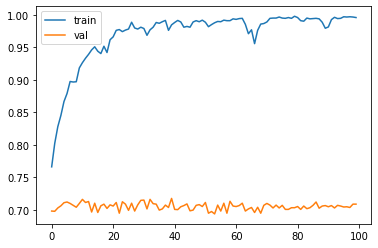

[]
Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 0.8905 - acc: 0.7805
Epoch 00001: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 46ms/step - loss: 0.8905 - acc: 0.7805 - val_loss: 0.9462 - val_acc: 0.6816
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.4522 - acc: 0.8232
Epoch 00002: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 49ms/step - loss: 0.4522 - acc: 0.8232 - val_loss: 0.8834 - val_acc: 0.6794
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.3837 - acc: 0.8433
Epoch 00003: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 49ms/step - loss: 0.3837 - acc: 0.8433 - val_loss: 0.9109 - val_acc: 0.6809
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 0.3451 - acc: 0.8599
Epoch 00004: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 49ms/step - loss: 0.3451 - acc: 0

Epoch 33/100
87/87 [==============================] - ETA: 0s - loss: 0.0323 - acc: 0.9903
Epoch 00033: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 49ms/step - loss: 0.0323 - acc: 0.9903 - val_loss: 2.1256 - val_acc: 0.6746
Epoch 34/100
87/87 [==============================] - ETA: 0s - loss: 0.0518 - acc: 0.9820
Epoch 00034: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 49ms/step - loss: 0.0518 - acc: 0.9820 - val_loss: 2.2182 - val_acc: 0.6599
Epoch 35/100
87/87 [==============================] - ETA: 0s - loss: 0.0453 - acc: 0.9874
Epoch 00035: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 47ms/step - loss: 0.0453 - acc: 0.9874 - val_loss: 2.1784 - val_acc: 0.6643
Epoch 36/100
87/87 [==============================] - ETA: 0s - loss: 0.0466 - acc: 0.9849
Epoch 00036: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 45ms/step - loss: 0.0466 - acc: 

Epoch 65/100
87/87 [==============================] - ETA: 0s - loss: 0.0067 - acc: 0.9978
Epoch 00065: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 48ms/step - loss: 0.0067 - acc: 0.9978 - val_loss: 2.6656 - val_acc: 0.6794
Epoch 66/100
87/87 [==============================] - ETA: 0s - loss: 0.0119 - acc: 0.9957
Epoch 00066: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 45ms/step - loss: 0.0119 - acc: 0.9957 - val_loss: 2.8097 - val_acc: 0.6775
Epoch 67/100
87/87 [==============================] - ETA: 0s - loss: 0.0175 - acc: 0.9946
Epoch 00067: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 46ms/step - loss: 0.0175 - acc: 0.9946 - val_loss: 2.7436 - val_acc: 0.6794
Epoch 68/100
87/87 [==============================] - ETA: 0s - loss: 0.0121 - acc: 0.9968
Epoch 00068: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 48ms/step - loss: 0.0121 - acc: 

Epoch 97/100
87/87 [==============================] - ETA: 0s - loss: 0.0090 - acc: 0.9975
Epoch 00097: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 48ms/step - loss: 0.0090 - acc: 0.9975 - val_loss: 2.7149 - val_acc: 0.6779
Epoch 98/100
87/87 [==============================] - ETA: 0s - loss: 0.0087 - acc: 0.9975
Epoch 00098: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 49ms/step - loss: 0.0087 - acc: 0.9975 - val_loss: 2.7015 - val_acc: 0.6823
Epoch 99/100
87/87 [==============================] - ETA: 0s - loss: 0.0077 - acc: 0.9971
Epoch 00099: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 48ms/step - loss: 0.0077 - acc: 0.9971 - val_loss: 2.7723 - val_acc: 0.6735
Epoch 100/100
87/87 [==============================] - ETA: 0s - loss: 0.0093 - acc: 0.9971
Epoch 00100: val_acc did not improve from 0.71753
87/87 [==============================] - 4s 45ms/step - loss: 0.0093 - acc:

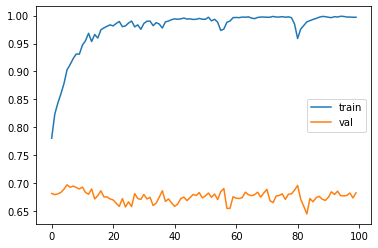

[]
Epoch 1/100
89/89 [==============================] - ETA: 0s - loss: 1.3085 - acc: 0.6070
Epoch 00001: val_acc did not improve from 0.71753
89/89 [==============================] - 4s 46ms/step - loss: 1.3085 - acc: 0.6070 - val_loss: 0.9790 - val_acc: 0.6625
Epoch 2/100
89/89 [==============================] - ETA: 0s - loss: 0.6833 - acc: 0.7045
Epoch 00002: val_acc did not improve from 0.71753
89/89 [==============================] - 4s 49ms/step - loss: 0.6833 - acc: 0.7045 - val_loss: 0.8018 - val_acc: 0.6801
Epoch 3/100
89/89 [==============================] - ETA: 0s - loss: 0.5983 - acc: 0.7275
Epoch 00003: val_acc did not improve from 0.71753
89/89 [==============================] - 4s 48ms/step - loss: 0.5983 - acc: 0.7275 - val_loss: 0.8063 - val_acc: 0.6849
Epoch 4/100
89/89 [==============================] - ETA: 0s - loss: 0.5438 - acc: 0.7505
Epoch 00004: val_acc did not improve from 0.71753
89/89 [==============================] - 4s 48ms/step - loss: 0.5438 - acc: 0

Epoch 32/100
88/89 [============================>.] - ETA: 0s - loss: 0.0961 - acc: 0.9638
Epoch 00032: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 62ms/step - loss: 0.0959 - acc: 0.9639 - val_loss: 2.0236 - val_acc: 0.6739
Epoch 33/100
89/89 [==============================] - ETA: 0s - loss: 0.0959 - acc: 0.9660
Epoch 00033: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 58ms/step - loss: 0.0959 - acc: 0.9660 - val_loss: 2.1861 - val_acc: 0.6772
Epoch 34/100
89/89 [==============================] - ETA: 0s - loss: 0.0941 - acc: 0.9617
Epoch 00034: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 59ms/step - loss: 0.0941 - acc: 0.9617 - val_loss: 2.0448 - val_acc: 0.6779
Epoch 35/100
88/89 [============================>.] - ETA: 0s - loss: 0.1032 - acc: 0.9616
Epoch 00035: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 59ms/step - loss: 0.1030 - acc: 

89/89 [==============================] - ETA: 0s - loss: 0.0489 - acc: 0.9826
Epoch 00063: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 59ms/step - loss: 0.0489 - acc: 0.9826 - val_loss: 2.5483 - val_acc: 0.6970
Epoch 64/100
89/89 [==============================] - ETA: 0s - loss: 0.0446 - acc: 0.9855- 
Epoch 00064: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 61ms/step - loss: 0.0446 - acc: 0.9855 - val_loss: 2.5809 - val_acc: 0.6970
Epoch 65/100
88/89 [============================>.] - ETA: 0s - loss: 0.0489 - acc: 0.9840
Epoch 00065: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 60ms/step - loss: 0.0488 - acc: 0.9841 - val_loss: 2.4766 - val_acc: 0.6911
Epoch 66/100
88/89 [============================>.] - ETA: 0s - loss: 0.0501 - acc: 0.9840
Epoch 00066: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 60ms/step - loss: 0.0500 - acc: 0.9841 - va

88/89 [============================>.] - ETA: 0s - loss: 0.0274 - acc: 0.9904
Epoch 00094: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 59ms/step - loss: 0.0273 - acc: 0.9904 - val_loss: 2.7175 - val_acc: 0.6893
Epoch 95/100
89/89 [==============================] - ETA: 0s - loss: 0.0320 - acc: 0.9911
Epoch 00095: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 60ms/step - loss: 0.0320 - acc: 0.9911 - val_loss: 2.7683 - val_acc: 0.6926
Epoch 96/100
89/89 [==============================] - ETA: 0s - loss: 0.0262 - acc: 0.9918
Epoch 00096: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 59ms/step - loss: 0.0262 - acc: 0.9918 - val_loss: 2.8534 - val_acc: 0.6933
Epoch 97/100
89/89 [==============================] - ETA: 0s - loss: 0.0263 - acc: 0.9915- ETA: 0s - loss: 0.0224 - ac
Epoch 00097: val_acc did not improve from 0.71753
89/89 [==============================] - 5s 59ms/step - loss

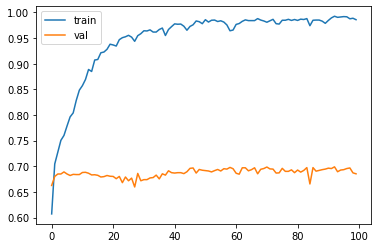

[]
Epoch 1/100
80/81 [============================>.] - ETA: 0s - loss: 1.1619 - acc: 0.6938
Epoch 00001: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 58ms/step - loss: 1.1563 - acc: 0.6953 - val_loss: 1.3058 - val_acc: 0.6827
Epoch 2/100
80/81 [============================>.] - ETA: 0s - loss: 0.7044 - acc: 0.7680
Epoch 00002: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 59ms/step - loss: 0.7016 - acc: 0.7691 - val_loss: 1.0128 - val_acc: 0.6691
Epoch 3/100
80/81 [============================>.] - ETA: 0s - loss: 0.5513 - acc: 0.8070
Epoch 00003: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 60ms/step - loss: 0.5489 - acc: 0.8080 - val_loss: 0.9461 - val_acc: 0.6794
Epoch 4/100
81/81 [==============================] - ETA: 0s - loss: 0.4715 - acc: 0.8298
Epoch 00004: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 62ms/step - loss: 0.4715 - acc: 0

80/81 [============================>.] - ETA: 0s - loss: 0.0942 - acc: 0.9645
Epoch 00032: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 61ms/step - loss: 0.0938 - acc: 0.9646 - val_loss: 2.2033 - val_acc: 0.6603
Epoch 33/100
81/81 [==============================] - ETA: 0s - loss: 0.0619 - acc: 0.9767- ETA: 2s - loss: 0.0 - ETA: 1s - loss: 0.0821
Epoch 00033: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 60ms/step - loss: 0.0619 - acc: 0.9767 - val_loss: 2.2315 - val_acc: 0.6456
Epoch 34/100
81/81 [==============================] - ETA: 0s - loss: 0.0589 - acc: 0.9798- 
Epoch 00034: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 59ms/step - loss: 0.0589 - acc: 0.9798 - val_loss: 2.2524 - val_acc: 0.6640
Epoch 35/100
80/81 [============================>.] - ETA: 0s - loss: 0.0343 - acc: 0.9871
Epoch 00035: val_acc did not improve from 0.71753
81/81 [==============================] - 

81/81 [==============================] - ETA: 0s - loss: 0.0231 - acc: 0.9891
Epoch 00063: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 60ms/step - loss: 0.0231 - acc: 0.9891 - val_loss: 2.5934 - val_acc: 0.6665
Epoch 64/100
80/81 [============================>.] - ETA: 0s - loss: 0.0149 - acc: 0.9945
Epoch 00064: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 60ms/step - loss: 0.0148 - acc: 0.9946 - val_loss: 2.6374 - val_acc: 0.6585
Epoch 65/100
80/81 [============================>.] - ETA: 0s - loss: 0.0193 - acc: 0.9918
Epoch 00065: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 60ms/step - loss: 0.0192 - acc: 0.9918 - val_loss: 2.5963 - val_acc: 0.6544
Epoch 66/100
80/81 [============================>.] - ETA: 0s - loss: 0.0281 - acc: 0.9895- ETA: 0s - loss: 0.0301 - acc: 0.
Epoch 00066: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 60ms/step -

80/81 [============================>.] - ETA: 0s - loss: 0.1032 - acc: 0.9703
Epoch 00094: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 63ms/step - loss: 0.1027 - acc: 0.9705 - val_loss: 2.3237 - val_acc: 0.6379
Epoch 95/100
81/81 [==============================] - ETA: 0s - loss: 0.0560 - acc: 0.9790
Epoch 00095: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 61ms/step - loss: 0.0560 - acc: 0.9790 - val_loss: 2.2817 - val_acc: 0.6647
Epoch 96/100
81/81 [==============================] - ETA: 0s - loss: 0.0267 - acc: 0.9911
Epoch 00096: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 61ms/step - loss: 0.0267 - acc: 0.9911 - val_loss: 2.4157 - val_acc: 0.6665
Epoch 97/100
80/81 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9883
Epoch 00097: val_acc did not improve from 0.71753
81/81 [==============================] - 5s 60ms/step - loss: 0.0368 - acc: 0.9883 - val_

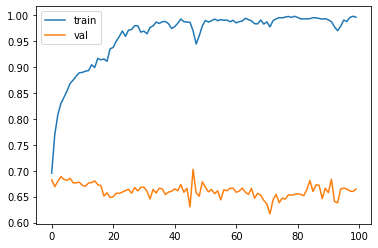

[]
Epoch 1/100
102/102 [==============================] - ETA: 0s - loss: 1.8539 - acc: 0.6171
Epoch 00001: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 58ms/step - loss: 1.8539 - acc: 0.6171 - val_loss: 0.8966 - val_acc: 0.6955
Epoch 2/100
101/102 [============================>.] - ETA: 0s - loss: 0.7985 - acc: 0.6841- ETA: 2s 
Epoch 00002: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 58ms/step - loss: 0.7962 - acc: 0.6853 - val_loss: 0.8248 - val_acc: 0.6915
Epoch 3/100
101/102 [============================>.] - ETA: 0s - loss: 0.7027 - acc: 0.7005
Epoch 00003: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 57ms/step - loss: 0.7007 - acc: 0.7016 - val_loss: 0.8386 - val_acc: 0.6794
Epoch 4/100
102/102 [==============================] - ETA: 0s - loss: 0.6408 - acc: 0.7235
Epoch 00004: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 55ms/st

Epoch 32/100
101/102 [============================>.] - ETA: 0s - loss: 0.0868 - acc: 0.9691
Epoch 00032: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 57ms/step - loss: 0.0864 - acc: 0.9692 - val_loss: 2.2456 - val_acc: 0.5517
Epoch 33/100
102/102 [==============================] - ETA: 0s - loss: 0.0943 - acc: 0.9645
Epoch 00033: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 57ms/step - loss: 0.0943 - acc: 0.9645 - val_loss: 2.3438 - val_acc: 0.5525
Epoch 34/100
101/102 [============================>.] - ETA: 0s - loss: 0.0763 - acc: 0.9743- ETA: 0s - loss: 0.0887 - a
Epoch 00034: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 57ms/step - loss: 0.0760 - acc: 0.9744 - val_loss: 2.3578 - val_acc: 0.5550
Epoch 35/100
101/102 [============================>.] - ETA: 0s - loss: 0.0565 - acc: 0.9830- ETA: 0s - loss: 0.0616 - acc:
Epoch 00035: val_acc did not improve from 0.71753
102

Epoch 63/100
101/102 [============================>.] - ETA: 0s - loss: 0.0243 - acc: 0.9923
Epoch 00063: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 58ms/step - loss: 0.0242 - acc: 0.9923 - val_loss: 2.6720 - val_acc: 0.5715
Epoch 64/100
101/102 [============================>.] - ETA: 0s - loss: 0.0190 - acc: 0.9941
Epoch 00064: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 58ms/step - loss: 0.0189 - acc: 0.9941 - val_loss: 2.6938 - val_acc: 0.5895
Epoch 65/100
102/102 [==============================] - ETA: 0s - loss: 0.0462 - acc: 0.9855
Epoch 00065: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 59ms/step - loss: 0.0462 - acc: 0.9855 - val_loss: 2.4712 - val_acc: 0.6211
Epoch 66/100
101/102 [============================>.] - ETA: 0s - loss: 0.1157 - acc: 0.9762
Epoch 00066: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 56ms/step - loss

Epoch 94/100
102/102 [==============================] - ETA: 0s - loss: 0.1026 - acc: 0.9676
Epoch 00094: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 56ms/step - loss: 0.1026 - acc: 0.9676 - val_loss: 2.8556 - val_acc: 0.5216
Epoch 95/100
101/102 [============================>.] - ETA: 0s - loss: 0.0900 - acc: 0.9756
Epoch 00095: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 57ms/step - loss: 0.0897 - acc: 0.9756 - val_loss: 2.4366 - val_acc: 0.5921
Epoch 96/100
101/102 [============================>.] - ETA: 0s - loss: 0.0572 - acc: 0.9780
Epoch 00096: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 57ms/step - loss: 0.0570 - acc: 0.9781 - val_loss: 2.3464 - val_acc: 0.5994
Epoch 97/100
102/102 [==============================] - ETA: 0s - loss: 0.0409 - acc: 0.9864
Epoch 00097: val_acc did not improve from 0.71753
102/102 [==============================] - 6s 56ms/step - loss

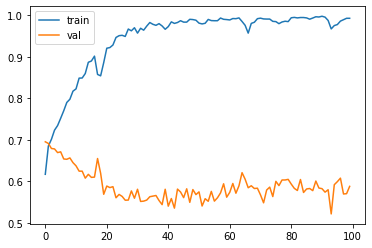

[]
Epoch 1/100
79/79 [==============================] - ETA: 0s - loss: 1.3477 - acc: 0.7261
Epoch 00001: val_acc did not improve from 0.71753
79/79 [==============================] - 5s 62ms/step - loss: 1.3477 - acc: 0.7261 - val_loss: 1.1145 - val_acc: 0.6581
Epoch 2/100
78/79 [============================>.] - ETA: 0s - loss: 0.5260 - acc: 0.8309
Epoch 00002: val_acc did not improve from 0.71753
79/79 [==============================] - 5s 60ms/step - loss: 0.5258 - acc: 0.8310 - val_loss: 1.0930 - val_acc: 0.6390
Epoch 3/100
79/79 [==============================] - ETA: 0s - loss: 0.4144 - acc: 0.8466
Epoch 00003: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 52ms/step - loss: 0.4144 - acc: 0.8466 - val_loss: 1.0940 - val_acc: 0.6409
Epoch 4/100
79/79 [==============================] - ETA: 0s - loss: 0.3541 - acc: 0.8694
Epoch 00004: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 51ms/step - loss: 0.3541 - acc: 0

Epoch 33/100
79/79 [==============================] - ETA: 0s - loss: 0.0798 - acc: 0.9728
Epoch 00033: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 54ms/step - loss: 0.0798 - acc: 0.9728 - val_loss: 1.8314 - val_acc: 0.6310
Epoch 34/100
78/79 [============================>.] - ETA: 0s - loss: 0.0646 - acc: 0.9752
Epoch 00034: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 55ms/step - loss: 0.0645 - acc: 0.9752 - val_loss: 1.8295 - val_acc: 0.6229
Epoch 35/100
79/79 [==============================] - ETA: 0s - loss: 0.0644 - acc: 0.9772
Epoch 00035: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 52ms/step - loss: 0.0644 - acc: 0.9772 - val_loss: 1.8143 - val_acc: 0.6423
Epoch 36/100
79/79 [==============================] - ETA: 0s - loss: 0.0633 - acc: 0.9764
Epoch 00036: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 51ms/step - loss: 0.0633 - acc: 

79/79 [==============================] - ETA: 0s - loss: 0.0242 - acc: 0.9920
Epoch 00064: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 50ms/step - loss: 0.0242 - acc: 0.9920 - val_loss: 1.9468 - val_acc: 0.6339
Epoch 65/100
79/79 [==============================] - ETA: 0s - loss: 0.0369 - acc: 0.9924
Epoch 00065: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 54ms/step - loss: 0.0369 - acc: 0.9924 - val_loss: 1.9847 - val_acc: 0.6247
Epoch 66/100
78/79 [============================>.] - ETA: 0s - loss: 0.0242 - acc: 0.9932
Epoch 00066: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 55ms/step - loss: 0.0242 - acc: 0.9932 - val_loss: 2.0071 - val_acc: 0.6225
Epoch 67/100
79/79 [==============================] - ETA: 0s - loss: 0.0165 - acc: 0.9952
Epoch 00067: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 53ms/step - loss: 0.0165 - acc: 0.9952 - val_

Epoch 96/100
78/79 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9872
Epoch 00096: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 50ms/step - loss: 0.0451 - acc: 0.9872 - val_loss: 2.0759 - val_acc: 0.6354
Epoch 97/100
79/79 [==============================] - ETA: 0s - loss: 0.0193 - acc: 0.9928
Epoch 00097: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 50ms/step - loss: 0.0193 - acc: 0.9928 - val_loss: 2.1755 - val_acc: 0.6170
Epoch 98/100
79/79 [==============================] - ETA: 0s - loss: 0.0135 - acc: 0.9964
Epoch 00098: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 49ms/step - loss: 0.0135 - acc: 0.9964 - val_loss: 2.1690 - val_acc: 0.6255
Epoch 99/100
79/79 [==============================] - ETA: 0s - loss: 0.0069 - acc: 0.9980
Epoch 00099: val_acc did not improve from 0.71753
79/79 [==============================] - 4s 49ms/step - loss: 0.0069 - acc: 

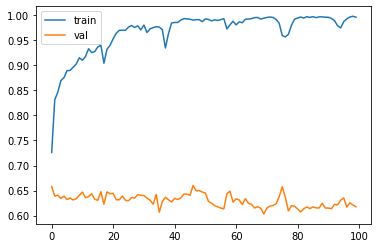

[]
Epoch 1/100
79/80 [============================>.] - ETA: 0s - loss: 1.2061 - acc: 0.7892
Epoch 00001: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 47ms/step - loss: 1.2058 - acc: 0.7883 - val_loss: 1.3469 - val_acc: 0.6941
Epoch 2/100
79/80 [============================>.] - ETA: 0s - loss: 0.5421 - acc: 0.8319
Epoch 00002: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 49ms/step - loss: 0.5428 - acc: 0.8307 - val_loss: 0.9236 - val_acc: 0.6871
Epoch 3/100
79/80 [============================>.] - ETA: 0s - loss: 0.4249 - acc: 0.8536
Epoch 00003: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 49ms/step - loss: 0.4259 - acc: 0.8526 - val_loss: 0.9092 - val_acc: 0.6930
Epoch 4/100
79/80 [============================>.] - ETA: 0s - loss: 0.3757 - acc: 0.8588
Epoch 00004: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 50ms/step - loss: 0.3775 - acc: 0

80/80 [==============================] - ETA: 0s - loss: 0.0271 - acc: 0.9918
Epoch 00032: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 54ms/step - loss: 0.0271 - acc: 0.9918 - val_loss: 2.1681 - val_acc: 0.6742
Epoch 33/100
79/80 [============================>.] - ETA: 0s - loss: 0.0342 - acc: 0.9889
Epoch 00033: val_acc did not improve from 0.71753
80/80 [==============================] - 5s 58ms/step - loss: 0.0342 - acc: 0.9890 - val_loss: 2.0977 - val_acc: 0.6533
Epoch 34/100
79/80 [============================>.] - ETA: 0s - loss: 0.0475 - acc: 0.9834
Epoch 00034: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 55ms/step - loss: 0.0474 - acc: 0.9835 - val_loss: 2.1132 - val_acc: 0.6618
Epoch 35/100
80/80 [==============================] - ETA: 0s - loss: 0.0409 - acc: 0.9851
Epoch 00035: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 53ms/step - loss: 0.0409 - acc: 0.9851 - val_

80/80 [==============================] - ETA: 0s - loss: 0.0416 - acc: 0.9851
Epoch 00063: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 55ms/step - loss: 0.0416 - acc: 0.9851 - val_loss: 2.4458 - val_acc: 0.6742
Epoch 64/100
80/80 [==============================] - ETA: 0s - loss: 0.0150 - acc: 0.9949
Epoch 00064: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 54ms/step - loss: 0.0150 - acc: 0.9949 - val_loss: 2.4570 - val_acc: 0.6702
Epoch 65/100
80/80 [==============================] - ETA: 0s - loss: 0.0175 - acc: 0.9941
Epoch 00065: val_acc did not improve from 0.71753
80/80 [==============================] - 4s 55ms/step - loss: 0.0175 - acc: 0.9941 - val_loss: 2.5211 - val_acc: 0.6779
Epoch 66/100
80/80 [==============================] - ETA: 0s - loss: 0.0163 - acc: 0.9945
Epoch 00066: val_acc did not improve from 0.71753
80/80 [==============================] - 5s 58ms/step - loss: 0.0163 - acc: 0.9945 - val_

Epoch 95/100
80/80 [==============================] - ETA: 0s - loss: 0.0145 - acc: 0.9957
Epoch 00095: val_acc did not improve from 0.71753
80/80 [==============================] - 5s 66ms/step - loss: 0.0145 - acc: 0.9957 - val_loss: 2.5602 - val_acc: 0.6676
Epoch 96/100
79/80 [============================>.] - ETA: 0s - loss: 0.0141 - acc: 0.9964- ETA: 0s - loss: 0.0120 - acc:
Epoch 00096: val_acc did not improve from 0.71753
80/80 [==============================] - 7s 87ms/step - loss: 0.0140 - acc: 0.9965 - val_loss: 2.5331 - val_acc: 0.6720
Epoch 97/100
80/80 [==============================] - ETA: 0s - loss: 0.0123 - acc: 0.9973
Epoch 00097: val_acc did not improve from 0.71753
80/80 [==============================] - 5s 59ms/step - loss: 0.0123 - acc: 0.9973 - val_loss: 2.5352 - val_acc: 0.6673
Epoch 98/100
79/80 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.9972
Epoch 00098: val_acc did not improve from 0.71753
80/80 [==============================] - 5s 6

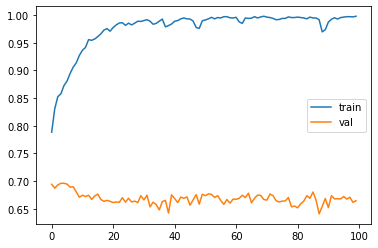

[]
Epoch 1/100
86/87 [============================>.] - ETA: 0s - loss: 1.3138 - acc: 0.6777
Epoch 00001: val_acc did not improve from 0.71753
87/87 [==============================] - 5s 63ms/step - loss: 1.3042 - acc: 0.6799 - val_loss: 1.1254 - val_acc: 0.6720
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.5669 - acc: 0.7781
Epoch 00002: val_acc did not improve from 0.71753
87/87 [==============================] - 5s 54ms/step - loss: 0.5669 - acc: 0.7781 - val_loss: 1.0434 - val_acc: 0.6798
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.4524 - acc: 0.8216
Epoch 00003: val_acc did not improve from 0.71753
87/87 [==============================] - 7s 75ms/step - loss: 0.4524 - acc: 0.8216 - val_loss: 1.0423 - val_acc: 0.6537
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 0.3903 - acc: 0.8428
Epoch 00004: val_acc did not improve from 0.71753
87/87 [==============================] - 7s 77ms/step - loss: 0.3903 - acc: 0

Epoch 32/100
87/87 [==============================] - ETA: 0s - loss: 0.0431 - acc: 0.9874
Epoch 00032: val_acc did not improve from 0.71753
87/87 [==============================] - 5s 55ms/step - loss: 0.0431 - acc: 0.9874 - val_loss: 2.1733 - val_acc: 0.6629
Epoch 33/100
87/87 [==============================] - ETA: 0s - loss: 0.0344 - acc: 0.9881
Epoch 00033: val_acc did not improve from 0.71753
87/87 [==============================] - 7s 77ms/step - loss: 0.0344 - acc: 0.9881 - val_loss: 2.2040 - val_acc: 0.6544
Epoch 34/100
87/87 [==============================] - ETA: 0s - loss: 0.0350 - acc: 0.9885- ETA: 2s - loss: 0.0302 - acc: 0.994 - E
Epoch 00034: val_acc did not improve from 0.71753
87/87 [==============================] - 6s 65ms/step - loss: 0.0350 - acc: 0.9885 - val_loss: 2.1860 - val_acc: 0.6519
Epoch 35/100
86/87 [============================>.] - ETA: 0s - loss: 0.0376 - acc: 0.9884
Epoch 00035: val_acc did not improve from 0.71753
87/87 [============================

87/87 [==============================] - ETA: 0s - loss: 0.0204 - acc: 0.9935
Epoch 00063: val_acc did not improve from 0.71753
87/87 [==============================] - 5s 52ms/step - loss: 0.0204 - acc: 0.9935 - val_loss: 2.5851 - val_acc: 0.6713
Epoch 64/100
87/87 [==============================] - ETA: 0s - loss: 0.0244 - acc: 0.9921
Epoch 00064: val_acc did not improve from 0.71753
87/87 [==============================] - 5s 55ms/step - loss: 0.0244 - acc: 0.9921 - val_loss: 2.6119 - val_acc: 0.6519
Epoch 65/100
 3/87 [>.............................] - ETA: 2s - loss: 0.0280 - acc: 0.9792['../../Dataset\\ARE(2005,2015).csv']
Epoch 1/100
81/87 [==========================>...] - ETA: 0s - loss: 1.1353 - acc: 0.7971['../../Dataset\\ARE(2005,2015).csv', '../../Dataset\\ATO(2005,2015).csv']
Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 0.5252 - acc: 0.8271
Epoch 00001: val_acc did not improve from 0.71753
78/78 [==============================] - 5s 59ms/step - los

In [ ]:
er = []
for train_name in range(0,70):
    try:
        df = pd.read_csv(datalist[train_name])
        df = signal_to_catagorical(df)
#         df = df[30:]
        x_train = df[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
        x_train = add_shift_day(x_train,30)
        y_train = df['Signal'] 
        y_train = to_categorical(y_train)
        y_train = y_train.tolist()
        del y_train[0:30]
        y_train = np.array(y_train)

        r = random.randint(0,2)
        val = val_list[0]
        val = signal_to_catagorical(val)
        x_val = val[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
        x_val = add_shift_day(x_val,30)
        y_val = val['Signal']
        y_val = to_categorical(y_val)
        y_val = y_val.tolist()
        del y_val[0:30]
        y_val = np.array(y_val)

        h = model.fit(x_train, y_train, epochs=100,validation_data=(x_val,y_val),callbacks=[checkpoint],shuffle=False)
        model.save('Model1_'+str(train_name)+'.h5')
        plt.plot(h.history['acc'])
        plt.plot(h.history['val_acc'])
        plt.legend(['train', 'val'])
        plt.show()
    except:
            er.append(datalist[train_name])
    print(er)


In [11]:
model = load_model('Model1_20.h5')

In [16]:
for test in test_list:
    # print(test)
    test = signal_to_catagorical(test)
    #   print(test)
    x_test = test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
    x_test = add_shift_day(x_test,30)
    y_test = test['Signal'].values
    y_test = y_test.tolist()
    del y_test[0:30]
    y_test = np.array(y_test)

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis = -1)
    y_test = y_test.astype('int64')
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test_y_pred)
    print("Confusion Matrix")
    print(cm)
    print("Accuracy")
    print(ac)

NameError: name 'y_test_y_pred' is not defined

C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Text(0.5, 0, 'Date')

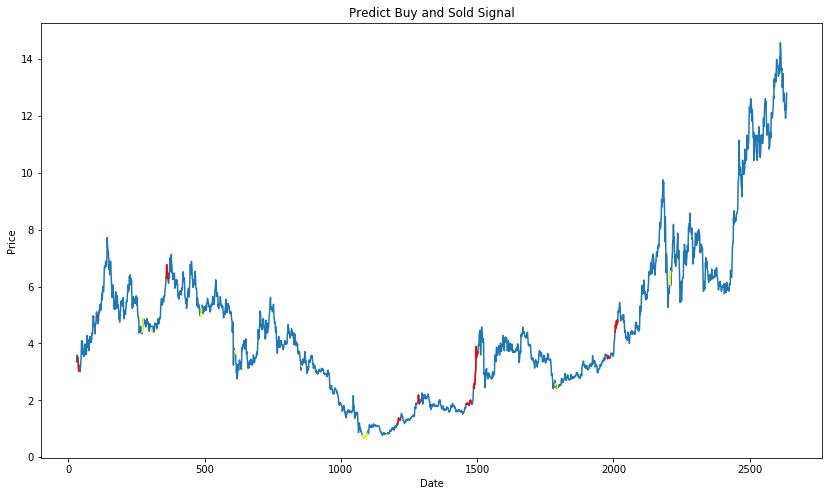

In [14]:
p_test = test_list[2]
p_test = signal_to_catagorical(p_test)
x_test = p_test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
x_test = add_shift_day(x_test,30)
y_test = p_test['Signal'].values
y_test = y_test.tolist()
del y_test[0:30]
y_test = np.array(y_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = -1)
p_test = p_test.iloc[30:]

p_test['pred'] = y_pred
p_test['pred_b'] = np.where(p_test['pred'] == 0,p_test['Close'],np.nan)
p_test['pred_s'] = np.where(p_test['pred'] == 1,p_test['Close'],np.nan)

plt.figure(figsize=(14,8))
# plt.grid()
plt.title('Predict Buy and Sold Signal')
plt.plot(p_test['Close'])
plt.plot(p_test['pred_b'],color='yellow')
plt.plot(p_test['pred_s'],color='red')
plt.ylabel('Price')
plt.xlabel('Date')